In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("survey_responses.csv")

# Remove whitespace from column names
df.columns = df.columns.str.strip()

df = df.drop(columns=['Timestamp'])

# Merge age categories, replacing 'Under 18' and '18 – 20' with 'Under 21', because 'Under 18' has only 1 response
df['What is your age?'] = df['What is your age?'].replace({
    'Under 18': 'Under 21',
    '18 – 20': 'Under 21'
})

# Rename columns
question_texts = {f"Q{i+1}": col for i, col in enumerate(df.columns)}
df.columns = list(question_texts.keys())



In [76]:
question_types = {
    "Q1": "multiple choice",
    "Q2": "multiple choice",
    "Q3": "multiple choice",
    "Q4": "short answer",
    "Q5": "short answer",
    "Q6": "multiple choice",
    "Q7": "likert scale",
    "Q8": "checkbox",
    "Q9": "likert scale",
    "Q10": "checkbox",
    "Q11": "likert scale",
    "Q12": "likert scale",
    "Q13": "checkbox",
    "Q14": "multiple choice",
    "Q15": "multiple choice",
    "Q16": "checkbox",
    "Q17": "checkbox",
    "Q18": "likert scale",
    "Q19": "multiple choice",
    "Q20": "checkbox",
    "Q21": "open-ended",
    "Q22": "checkbox",
    "Q23": "multiple choice",
    "Q24": "likert scale",
    "Q25": "multiple choice",
    "Q26": "open-ended",
    "Q27": "multiple choice",
    "Q28": "multiple choice",
    "Q29": "multiple choice",
    "Q30": "multiple choice",
    "Q31": "multiple choice",
    "Q32": "likert scale",
    "Q33": "checkbox",
    "Q34": "likert scale",
    "Q35": "checkbox",
    "Q36": "open-ended",
    "Q37": "open-ended",
    "Q38": "open-ended"
}

# Table
rows = []
for q, text in question_texts.items():
    rows.append({
        "Q": q,
        "Type": question_types.get(q),
        "Text": text
    })

# Create DF
questions_df = pd.DataFrame(rows)
# questions_df


In [77]:
# Map official option to relevant questions

official_options_map = {
    # multiple choice options
    "Q1": [
        "Under 21",
        "21 – 23",
        "24 – 26",
        "27 or older"
    ],
    "Q2": [
        "Female",
        "Male",
        "Non-binary",
        "Prefer not to say"
    ],
    "Q3": [
        "BTS",
        "Bachelor",
        "Master",
        "PhD or Doctoral studies"
    ],
    "Q6": [
        "None / I eat everything",
        "Vegetarian",
        "Vegan",
        "Halal",
        "Kosher",
        "Gluten-Free",
        "Lactose-Free",
        "Allergies or intolerances"
    ],
    "Q14": [
        "Yes, significantly",
        "Yes",
        "Only a bit",
        "Not at all"
    ],
    "Q15": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q19": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q23": [
        "I’d be more willing",
        "I’d be less willing",
        "It wouldn’t make a difference",
        "Not sure"
    ],
    "Q25": [
        "More likely",
        "Less likely",
        "No effect",
        "Not sure"
    ],
    "Q27": [
        "Yes, many times",
        "Yes, sometimes",
        "No, but I’ve used it for other topics",
        "No, I’ve never used tools like ChatGPT",
        "I’ve heard of them, but never tried them"
    ],
    "Q28": [
        "Yes",
        "No"
    ],
    "Q29": [
        "Yes, often",
        "Occasionally",
        "Rarely",
        "Never",
        "Not applicable / I don’t follow such preferences"
    ],
    "Q30": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q31": [
        "A chat-style conversation",
        "A form where I fill in options and get advice",
        "A mix of both",
        "Not sure"
    ],

    # checkbox options
    "Q8": [
        "I skip meals",
        "I crave unhealthy or comfort food",
        "I snack more often",
        "I eat at irregular times",
        "I eat healthier to stay focused",
        "No major changes"
    ],
    "Q10": [
        "Time availability",
        "Budget constraints",
        "Physical wellbeing",
        "Emotional state",
        "Social influence"
    ],
    "Q13": [
        "Nutritional goals",
        "Mood or emotional state",
        "Energy or focus levels",
        "Cultural food preferences",
        "Budget constraints",
        "Sleep or physical health",
        "Device data, like wearables",
        "Religious or ethical preferences",
        "Available time to cook or eat"
    ],
    "Q16": [
        "Adapts to my daily schedule or workload",
        "Considers my budget or what food I have",
        "Suggests quick meals when I'm busy",
        "Checks how I feel before suggesting food",
        "Lets me rate or respond to each recommendation"
    ],
    "Q17": [
        "Gentle reminders",
        "Motivational messages based on how I feel",
        "Tracking meals or consistency",
        "Celebrating small successes",
        "Healthier snack suggestions",
        "Setting flexible daily goals",
        "Challenges with friends or study groups"
    ],
    "Q20": [
        "It matches my dietary needs",
        "It reflects my mood or energy level",
        "It gives a scientific or nutritional reason for its suggestions",
        "It builds on what I’ve chosen before",
        "It uses friendly or human-like language",
        "It fits my current routine or schedule",
        "It allows me to give feedback on suggestions"
    ],
    "Q22": [
        "My dietary needs or preferences",
        "My stress levels",
        "My sleep patterns",
        "My daily schedule or class timetable",
        "My emotional state",
        "My budget",
        "Data from wearables or health trackers"
    ],
    "Q33": [
        "Pre-written templates to show how to ask a question",
        "Step-by-step help for making a request",
        "A helpful conversation that asks clarifying questions",
        "Automatic suggestions based on my situation, like time or stress level",
        "Easy ways to adjust or rewrite my request"
    ],
    "Q35": [
        "Rephrase my request and try again",
        "Ask a follow-up to clarify",
        "Stop using it and look elsewhere",
        "Not sure"
    ]
}


In [78]:
# Likert scale mappings for questions

likert_maps = {
    "Q7": {
        1: "Never",
        2: "Rarely",
        3: "Sometimes",
        4: "Often",
        5: "Always"
    },
    "Q9": {
        1: "Not difficult at all",
        2: "Slightly difficult",
        3: "Moderately difficult",
        4: "Very difficult",
        5: "Extremely difficult"
    },
    "Q11": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q12": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q18": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Mostly",
        5: "Completely"
    },
    "Q24": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q32": {
        1: "Not confident at all",
        2: "Slightly confident",
        3: "Moderately confident",
        4: "Confident",
        5: "Very confident"
    },
    "Q34": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Very",
        5: "Very much"
    }
}


In [79]:
# Field mapping for Field of Study into broader categories

field_map = {
    # STEM
    'Computer Science': 'STEM',
    'Mathematics': 'STEM',
    'IT': 'STEM',
    'Informatics': 'STEM',
    'Computer Engineering': 'STEM',
    'Computer Science Engineering': 'STEM',
    'Data Science': 'STEM',
    'Data Science and Artificial Intelligence': 'STEM',
    'Neuromorphic Computing': 'STEM',
    'HPC': 'STEM',
    'Physics': 'STEM',
    'Space': 'STEM',
    'Civil Engineering': 'STEM',
    'Environmental Engineering': 'STEM',
    'Computational Biology': 'STEM',
    'Computational Linguistics': 'STEM',
    'Game Design & Development': 'STEM',

    # Health & Life Sciences
    'Sport and Exercise Science': 'Health & Life Sciences',
    'Sport Management': 'Health & Life Sciences',
    'Sport Management and Digitalisation': 'Health & Life Sciences',
    'Physiotherapy': 'Health & Life Sciences',
    'Nursing': 'Health & Life Sciences',
    'Biology': 'Health & Life Sciences',
    'Integrated Systems Biology': 'Health & Life Sciences',
    'Nutrition': 'Health & Life Sciences',
    'Nutrition Sciences': 'Health & Life Sciences',
    'Nutrition, Fitness & Health': 'Health & Life Sciences',

    # Business & Economics
    'Economics': 'Business & Economics',
    'Finance': 'Business & Economics',
    'Accounting': 'Business & Economics',
    'Accounting and Audit': 'Business & Economics',
    'Finance and Economics': 'Business & Economics',
    'Global Business': 'Business & Economics',
    'Innovation and Entrepreneurship': 'Business & Economics',
    'Digital Business and Innovation': 'Business & Economics',
    'Master in Management': 'Business & Economics',
    'Entrepreneurship': 'Business & Economics',
    'Management and Service Engineering': 'Business & Economics',
    'Human Resources Management': 'Business & Economics',

    # Social Sciences & Humanities
    'History': 'Social Sciences & Humanities',
    'German and History (Master of Education)': 'Social Sciences & Humanities',
    'Social Sciences': 'Social Sciences & Humanities',
    'Education': 'Social Sciences & Humanities',
    'Applied Linguistics': 'Social Sciences & Humanities',
    'Translation and Multilingual Communication': 'Social Sciences & Humanities',
    'English Literature': 'Social Sciences & Humanities',
    'Medieval and Early Modern Studies': 'Social Sciences & Humanities',
    'Design & Language (2BAs)': 'Social Sciences & Humanities',

    # Creative & Design
    'Graphics Design': 'Creative & Design',
    'Creative Writing': 'Creative & Design',
    'Media': 'Creative & Design',
}

In [80]:
# Function to process multiple choice questions

def process_multiple_choice(column, official_options):
    # Count all answers
    counts = df[column].value_counts(dropna=True)

    # Filter out official options
    counts_filtered = counts[counts.index.isin(official_options)]

    # Filter out "Other..."
    other_answers = counts[~counts.index.isin(official_options)]
    other_answers = other_answers[other_answers.index.str.strip() != ""]

    return counts_filtered, other_answers


In [81]:
# Function to process checkbox questions using MultiLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

def process_checkbox(column, official_options, join_to_df=False):
    # Get a list of all values
    list_col = df[column].fillna('').str.split(';')

    # Create dummy variables
    mlb = MultiLabelBinarizer()
    dummies = pd.DataFrame(mlb.fit_transform(list_col),
                           columns=mlb.classes_,
                           index=list_col.index)
    
    # Variable for official options
    filtered = dummies[official_options]

    # Variable for "Other..." options
    raw_others = set(mlb.classes_) - set(official_options)
    others = [opt for opt in raw_others if opt.strip() != ""]

    # Optional: Add new columns to dataframe for cross-analysis
    if join_to_df:
        # Add "QX_" to each new column
        filtered_prefixed = filtered.add_prefix(f"{column}_")
        filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')
        updated_df = df.join(filtered_prefixed)

        # Add a "QX_Other" column if there are "Other..." options
        if others:
            others_mask = dummies[list(others)].sum(axis=1) > 0
            updated_df[f"{column}_Other"] = others_mask.astype(int)

        return filtered, others, dummies, updated_df

    return filtered, others, dummies


In [82]:
# Function to create a DataFrame for multiple choice questions

def mc_block(filtered, others, qid):
    counts = filtered.reindex(official_options_map[qid], fill_value=0)
    percent = (counts / len(df) * 100).round(2)
    mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

    # If there are "Other..." answers, add them to the results
    if len(others) > 0:
        other_count = others.sum()
        other_percent = round((other_count / len(df)) * 100, 2)
        
        # Append to mc_results
        mc_results.loc['Other'] = [other_count, other_percent]
        mc_results['Count'] = mc_results['Count'].astype(int)

    print(f"Quantitative results for {qid}")
    print("-----------------------")
    print(mc_results)
    print("-----------------------")

    # Save results of "Other..." answers in a CSV file
    if len(others) > 0:
        pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    return mc_results

""" # Show saved results of "Other..." answers
if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)
    print("-----------------------") """

' # Show saved results of "Other..." answers\nif len(others) > 0:\n    print(f"\nOther answers from {qid}:")\n    print("-----------------------")\n    for answer in others.index:\n        print(answer)\n    print("-----------------------") '

In [83]:
# Function to create a DataFrame for checkbox questions

def cb_block(filtered, others, dummies, qid):
    counts = filtered.sum().sort_values(ascending=False)
    percent = (counts / len(df) * 100).round(2)
    cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

    # If there are "Other..." answers, add them to the results
    if others:
        others_mask = dummies[others].sum(axis=1) > 0
        other_count = others_mask.sum()
        other_percent = round((other_count / len(df)) * 100, 2)
        cb_results.loc['Other'] = [other_count, other_percent]
        cb_results['Count'] = cb_results['Count'].astype(int)


    print(f"Quantitative results for {qid}")
    print("-----------------------")
    print(cb_results)
    print("-----------------------")

    # Save results of "Other..." answers in a CSV file
    if len(others) > 0:
        pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    return cb_results


In [84]:
# Function to create a DataFrame for likert scale questions

def ls_block(qid):
    # Map the Likert scale options to the DataFrame
    df[f'{qid}_labeled'] = pd.Categorical(
        df[qid].map(likert_maps[qid]),
        categories=list(likert_maps[qid].values()),
        ordered=True
    )

    counts = df[f'{qid}_labeled'].value_counts().sort_index()
    percent = (counts / len(df) * 100).round(2)
    ls_results = pd.DataFrame({'Count': counts, 'Percent': percent})

    print(f"Quantitative results for {qid}")
    print("-----------------------")
    print(ls_results)
    print("-----------------------")

    return ls_results


In [85]:
# Function to create a DataFrame for open-ended questions

def open_ended_block(qid):
    answers = df[qid].dropna().str.strip()
    answers.to_csv(f"{qid}_cleaned.csv", index=False)

    return answers

In [86]:
# Calculate statistics for Likert scale questions

def calculate_likert_statistics(qid):
    mean_score = df[qid].mean()
    median_score = df[qid].median()
    std_score = df[qid].std()
    high_difficulty_percent = (
        ((df[qid] == 4).sum() + (df[qid] == 5).sum()) / len(df[qid]) * 100
    )
    low_percent = (
        ((df[qid] == 1).sum() + (df[qid] == 2).sum()) / len(df[qid]) * 100
    )

    print(f"Mean: {mean_score:.2f}")
    print(f"Median: {median_score}")
    print(f"Standard Deviation: {std_score:.2f}")
    print(f"Percentage rating '4' or '5': {high_difficulty_percent:.1f}%")
    print(f"Percentage rating '1' or '2': {low_percent:.1f}%")


In [87]:
""" -------------------- RESULTS -------------------- """

' -------------------- RESULTS -------------------- '

Quantitative results for Q1
-----------------------
             Count  Percent
Q1                         
Under 21         9     8.26
21 – 23         24    22.02
24 – 26         48    44.04
27 or older     28    25.69
-----------------------


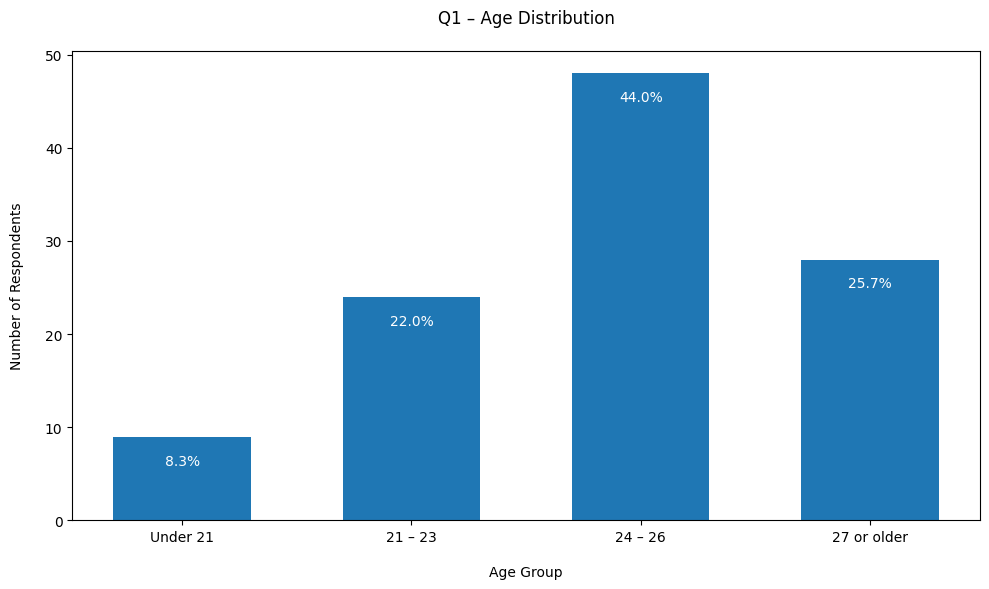

In [88]:
# Q1 – Age (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q1'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q1 – Age Distribution', pad=20)
plt.xlabel('Age Group', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')


plt.tight_layout()
plt.show()



Quantitative results for Q2
-----------------------
                   Count  Percent
Q2                               
Female                49    44.95
Male                  57    52.29
Non-binary             2     1.83
Prefer not to say      1     0.92
-----------------------


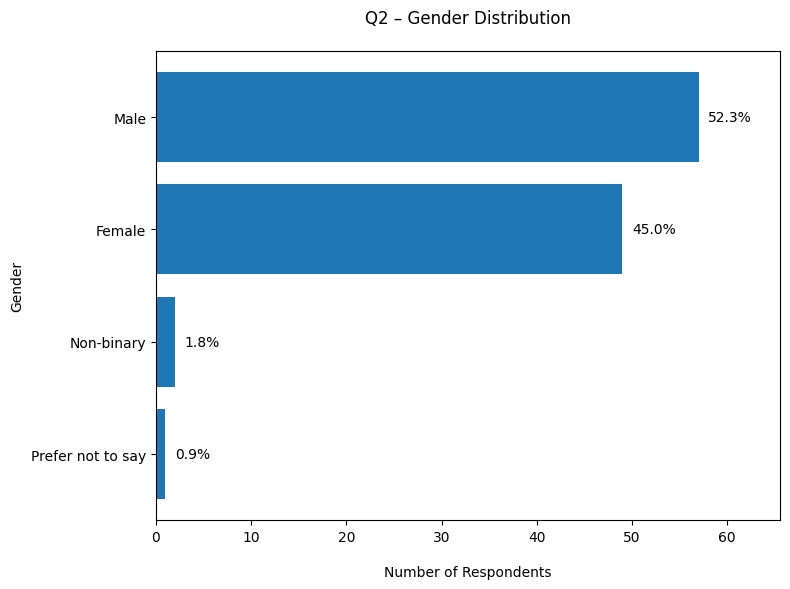

In [89]:
# Q2 – Gender (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q2'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Sort by count
mc_results_sorted = mc_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q2 – Gender Distribution', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Gender', labelpad=5)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q3
-----------------------
                         Count  Percent
Q3                                     
BTS                          3     2.75
Bachelor                    37    33.94
Master                      59    54.13
PhD or Doctoral studies     10     9.17
-----------------------


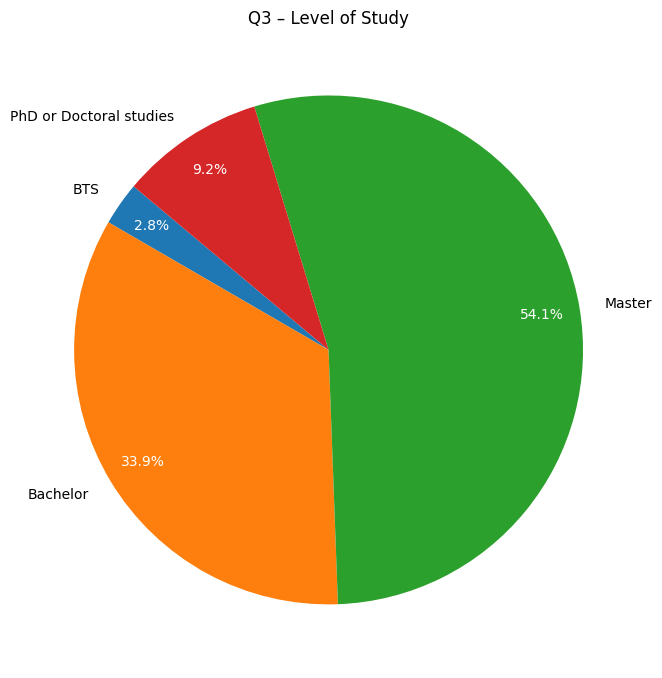

In [90]:
# Q3 – Level of Study (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q3'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q3 – Level of Study')
plt.tight_layout()
plt.show()

Quantitative results for Q4
-----------------------
                              Count  Percent
Q4                                          
STEM                             49    44.95
Health & Life Sciences           25    22.94
Business & Economics             20    18.35
Social Sciences & Humanities     12    11.01
Creative & Design                 3     2.75
-----------------------


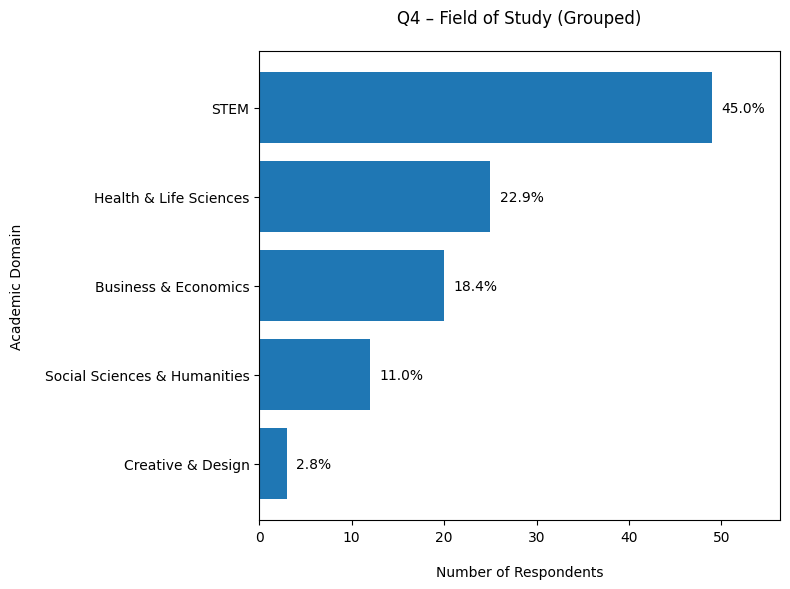

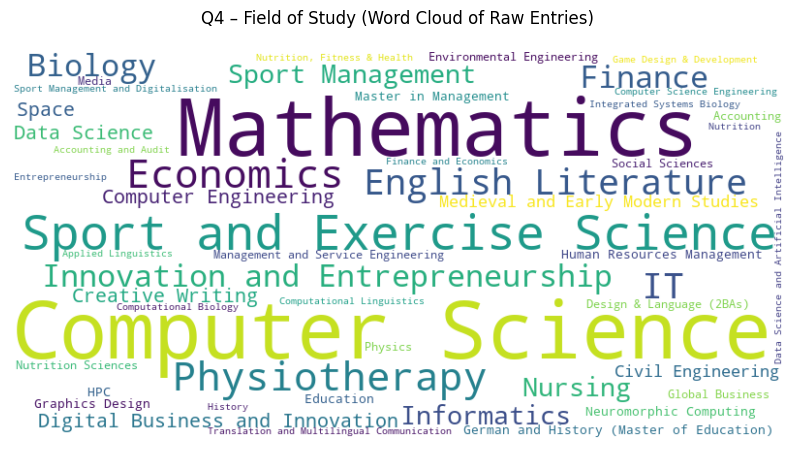

In [91]:
# Q4 – Field of Study (Short Answer)
# Cross-analysis count: 0

qid = 'Q4'

q4_clean = df[qid].dropna().str.strip()

q4_grouped = q4_clean.map(field_map)

df['Q4_labeled'] = q4_grouped

# Counts
counts = q4_grouped.value_counts()
percent = (counts / len(q4_grouped) * 100).round(2)
q4_grouped_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(q4_grouped_results)
print("-----------------------")

# Sort by count
mc_results_sorted = q4_grouped_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q4 – Field of Study (Grouped)', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Academic Domain', labelpad=15)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)
plt.xticks(range(0, 60, 10))


# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()

# Wordcloud for Q4
from collections import Counter
from wordcloud import WordCloud

# Create a word cloud from the raw entries of Q4
freq = Counter(q4_clean)
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Q4 – Field of Study (Word Cloud of Raw Entries)', pad=20)
plt.show()

# Export to CSV
q4_clean.to_csv(f"{qid}_results.csv")


Quantitative results for Q5
-----------------------
                Count  Percent
Q5                            
Luxembourg         80    73.39
Portugal            7     6.42
Germany             6     5.50
Belgium             6     5.50
France              5     4.59
United Kingdom      3     2.75
Switzerland         1     0.92
Netherlands         1     0.92
-----------------------


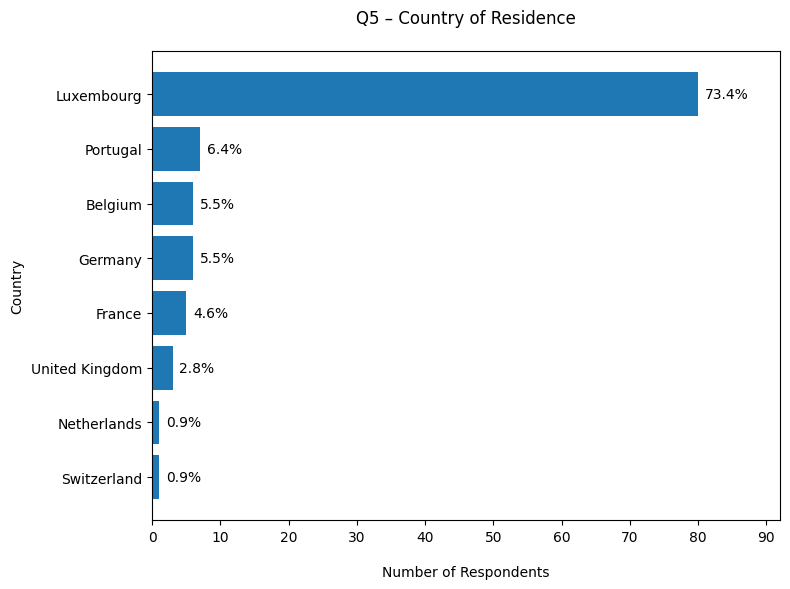

In [92]:
# Q5 – Country of Residence (Short Answer)
# Cross-analysis count: 0

qid = 'Q5'

q5_clean = df[qid].dropna().str.strip()

# Counts and percentages
counts = q5_clean.value_counts()
percent = (counts / len(q5_clean) * 100).round(2)
q5_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(q5_results)
print("-----------------------")

# Sort by count
mc_results_sorted = q5_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q5 – Country of Residence', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Country', labelpad=5)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)
plt.xticks(range(0, 100, 10))


# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q6
-----------------------
                           Count  Percent
Q6                                       
None / I eat everything       77    70.64
Vegetarian                     9     8.26
Vegan                          0     0.00
Halal                          6     5.50
Kosher                         0     0.00
Gluten-Free                    0     0.00
Lactose-Free                   5     4.59
Allergies or intolerances      6     5.50
Other                          6     5.50
-----------------------


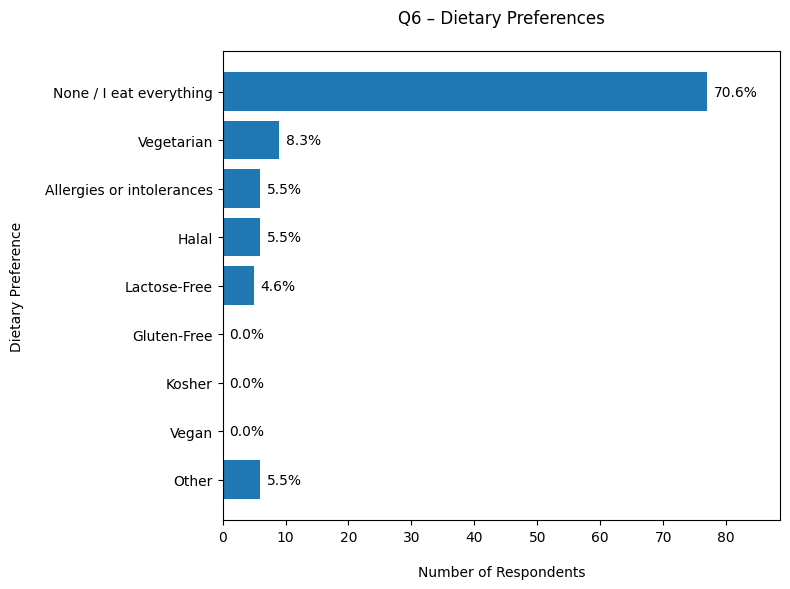

In [93]:
# Q6 – Dietary Preferences (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q6'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Sort by count and move "Other" to the bottom
other_row = mc_results.loc[['Other']]
main_rows = mc_results.drop('Other')
mc_results_sorted = pd.concat([
    other_row,
    main_rows.sort_values(by='Count', ascending=True)
])

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_sorted.index, mc_results_sorted['Count'], color='#1f77b4')
plt.title('Q6 – Dietary Preferences', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Dietary Preference', labelpad=15)
max_count = mc_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q7
-----------------------
            Count  Percent
Q7_labeled                
Never          11    10.09
Rarely         17    15.60
Sometimes      25    22.94
Often          34    31.19
Always         22    20.18
-----------------------
Mean: 3.36
Median: 4.0
Standard Deviation: 1.25
Percentage rating '4' or '5': 51.4%
Percentage rating '1' or '2': 25.7%


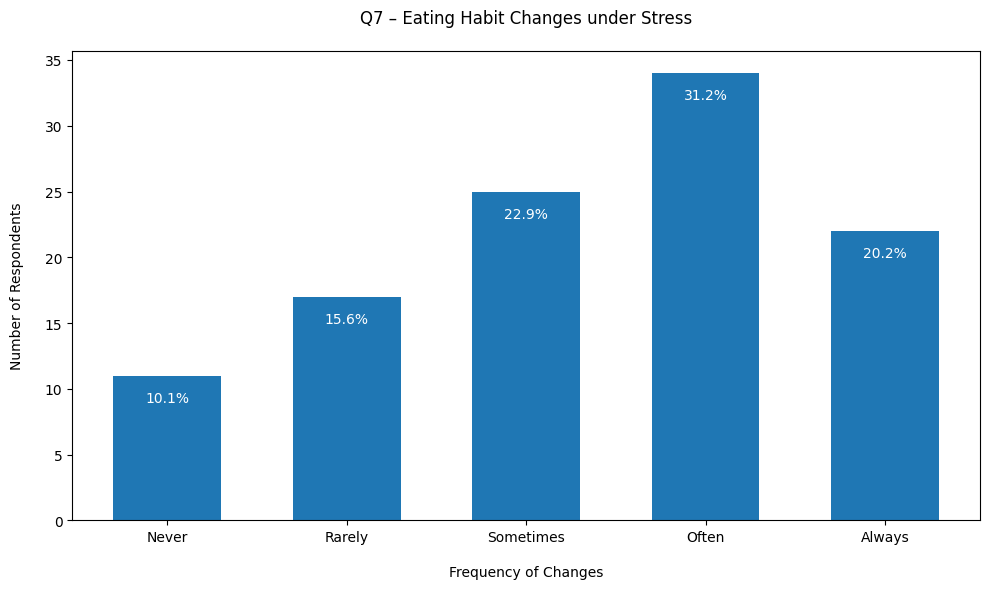

In [94]:
# Q7 – Eating Habit Changes under Stress (Likert Scale)
# Cross-analysis count: 0

qid = 'Q7'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q7 – Eating Habit Changes under Stress', pad=20)
plt.xlabel('Frequency of Changes', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q8
-----------------------
                                   Count  Percent
I snack more often                    56    51.38
I eat at irregular times              54    49.54
I crave unhealthy or comfort food     51    46.79
I skip meals                          35    32.11
No major changes                      13    11.93
I eat healthier to stay focused        5     4.59
Other                                  4     3.67
-----------------------


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


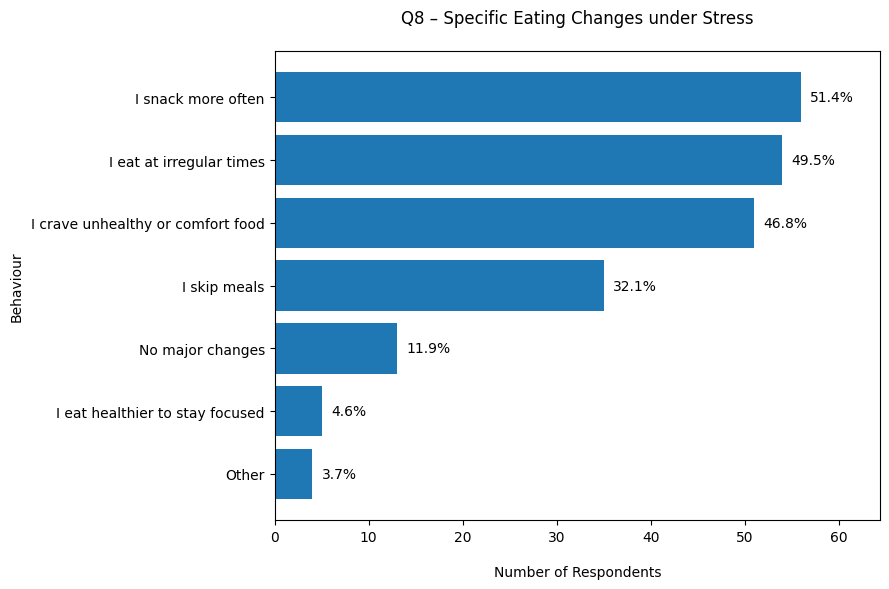

In [95]:
# Q8 – Specific Eating Changes under Stress (Checkboxes)
# Cross-analysis count: 0

qid = 'Q8'

filtered, others, dummies, updated_df = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = updated_df

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q8 – Specific Eating Changes under Stress', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Behaviour', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q9
-----------------------
                      Count  Percent
Q9_labeled                          
Not difficult at all     11    10.09
Slightly difficult       25    22.94
Moderately difficult     26    23.85
Very difficult           31    28.44
Extremely difficult      16    14.68
-----------------------
Mean: 3.15
Median: 3.0
Standard Deviation: 1.22
Percentage rating '4' or '5': 43.1%
Percentage rating '1' or '2': 33.0%


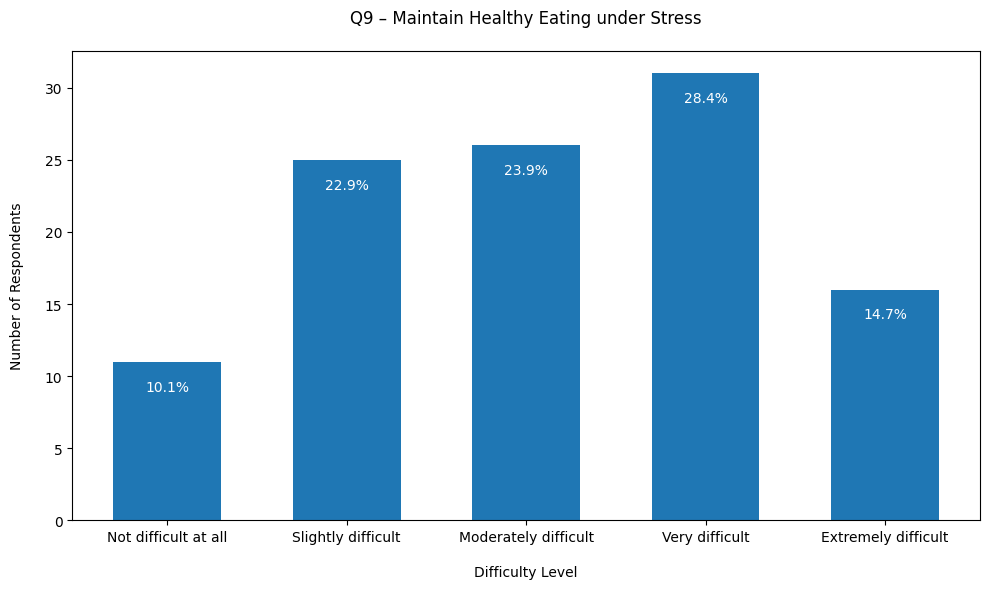

In [96]:
# Q9 – Maintain Healthy Eating under Stress (Likert Scale)
# Cross-analysis count: 0

qid = 'Q9'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
bars = plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q9 – Maintain Healthy Eating under Stress', pad=20)
plt.xlabel('Difficulty Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q10
-----------------------
                    Count  Percent
Time availability      81    74.31
Emotional state        67    61.47
Physical wellbeing     22    20.18
Budget constraints     20    18.35
Social influence       14    12.84
Other                   1     0.92
-----------------------


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


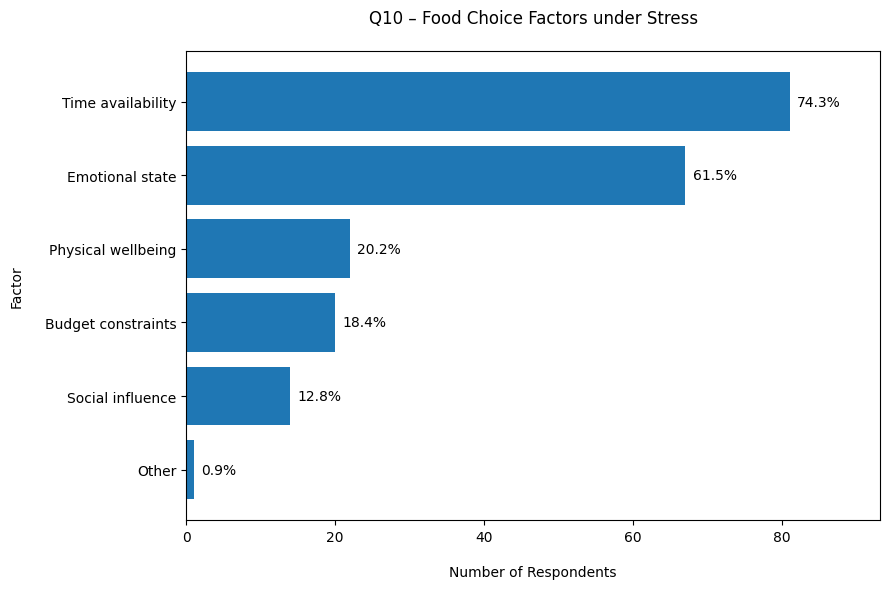

In [97]:
# Q10 – Food Choice Factors under Stress (Checkboxes)
# Cross-analysis count: 0

qid = 'Q10'

filtered, others, dummies, df_updated = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = df_updated

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q10 – Food Choice Factors under Stress', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Factor', labelpad=15)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q11
-----------------------
                      Count  Percent
Q11_labeled                         
Not important            13    11.93
Slightly important       12    11.01
Moderately important     35    32.11
Important                28    25.69
Very important           21    19.27
-----------------------
Mean: 3.29
Median: 3.0
Standard Deviation: 1.24
Percentage rating '4' or '5': 45.0%
Percentage rating '1' or '2': 22.9%


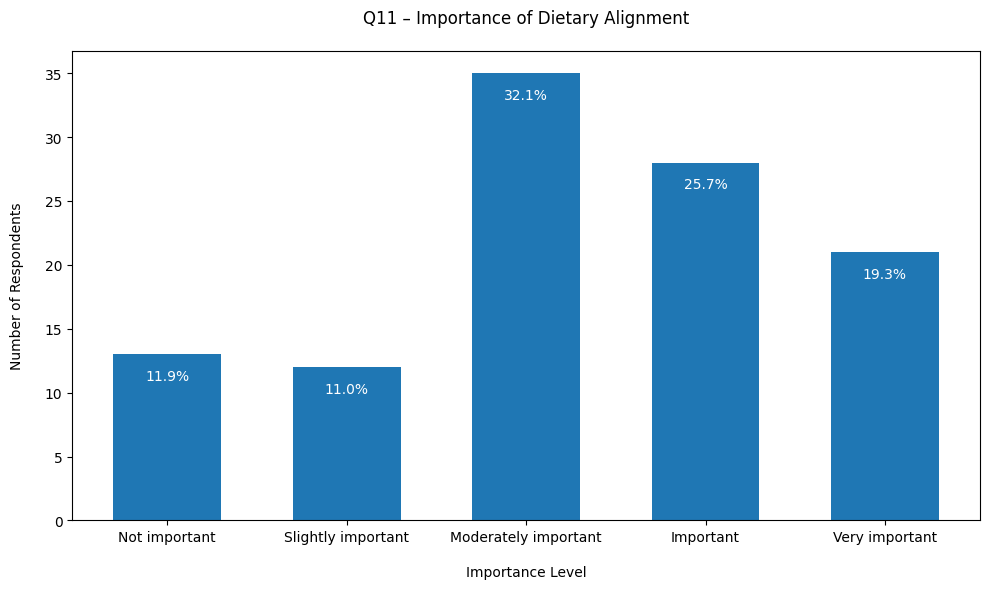

In [98]:
# Q11 – Importance of Dietary Alignment (Likert Scale)
# Cross-analysis count: 0

qid = 'Q11'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q11 – Importance of Dietary Alignment', pad=20)
plt.xlabel('Importance Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()



Quantitative results for Q12
-----------------------
                      Count  Percent
Q12_labeled                         
Not important            10     9.17
Slightly important       18    16.51
Moderately important     36    33.03
Important                30    27.52
Very important           15    13.76
-----------------------
Mean: 3.20
Median: 3.0
Standard Deviation: 1.15
Percentage rating '4' or '5': 41.3%
Percentage rating '1' or '2': 25.7%


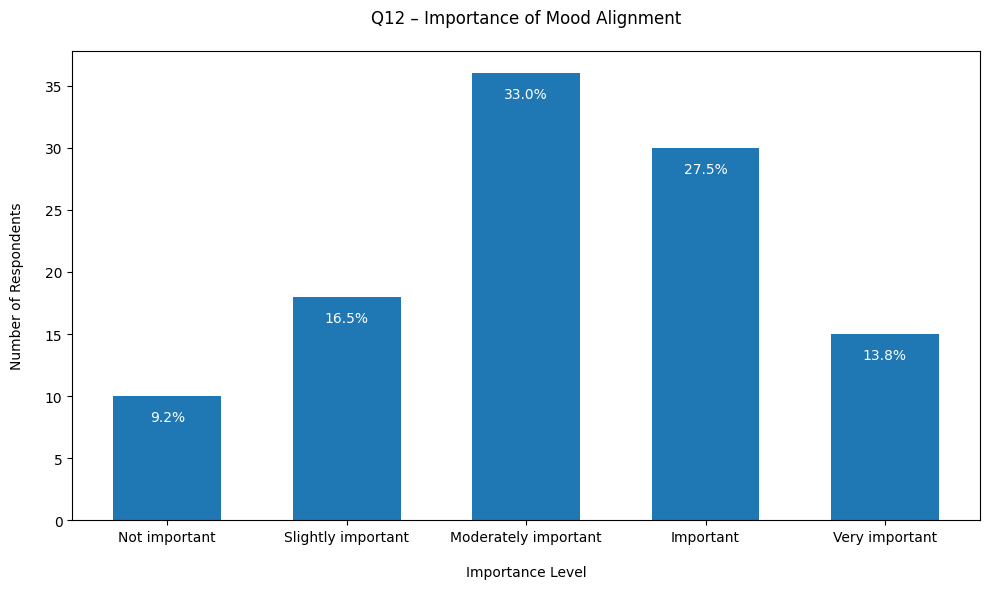

In [99]:
# Q12 – Importance of Mood Alignment (Likert Scale)
# Cross-analysis count: 0

qid = 'Q12'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q12 – Importance of Mood Alignment', pad=20)
plt.xlabel('Importance Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q13
-----------------------
                                  Count  Percent
Nutritional goals                    70    64.22
Available time to cook or eat        66    60.55
Energy or focus levels               59    54.13
Budget constraints                   47    43.12
Sleep or physical health             43    39.45
Mood or emotional state              35    32.11
Cultural food preferences            15    13.76
Religious or ethical preferences     11    10.09
Device data, like wearables           4     3.67
-----------------------


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


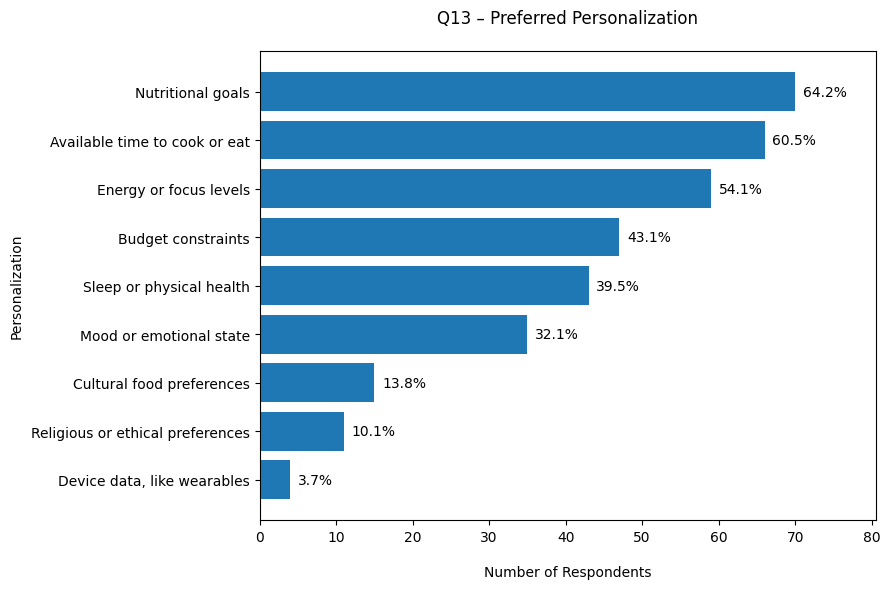

In [100]:
# Q13 – Preferred Personalization (Checkboxes)
# Cross-analysis count: 0

qid = 'Q13'

filtered, others, dummies, df_updated = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = df_updated

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q13 – Preferred Personalization', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Personalization', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q14
-----------------------
                    Count  Percent
Q14                               
Yes, significantly     30    27.52
Yes                    41    37.61
Only a bit             28    25.69
Not at all             10     9.17
-----------------------


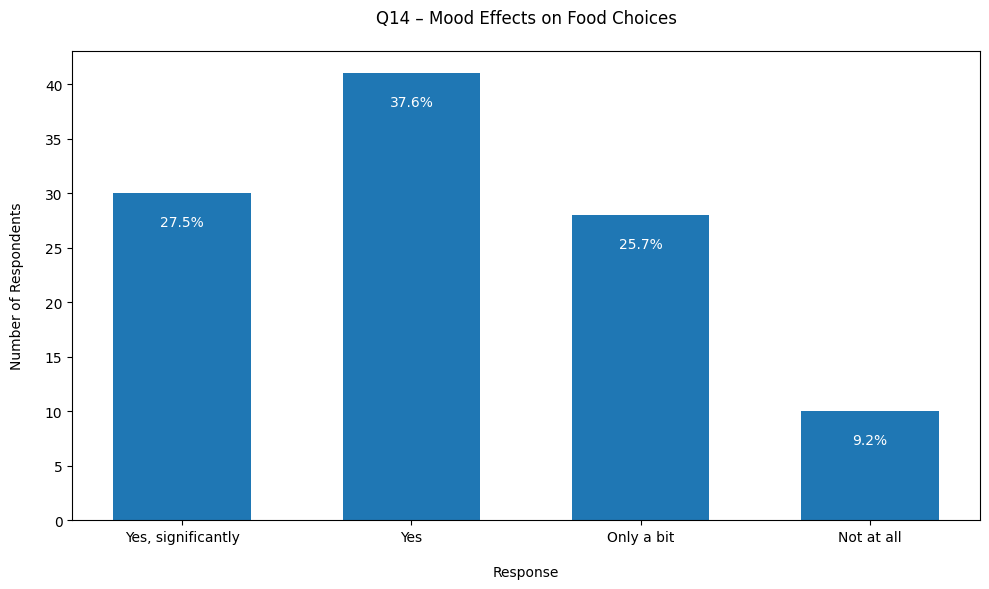

In [101]:
# Q14 – Mood Effects on Food Choices (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q14'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q14 – Mood Effects on Food Choices', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q15
-----------------------
          Count  Percent
Q15                     
Yes          67    61.47
No            5     4.59
Not sure     36    33.03
Other         1     0.92
-----------------------


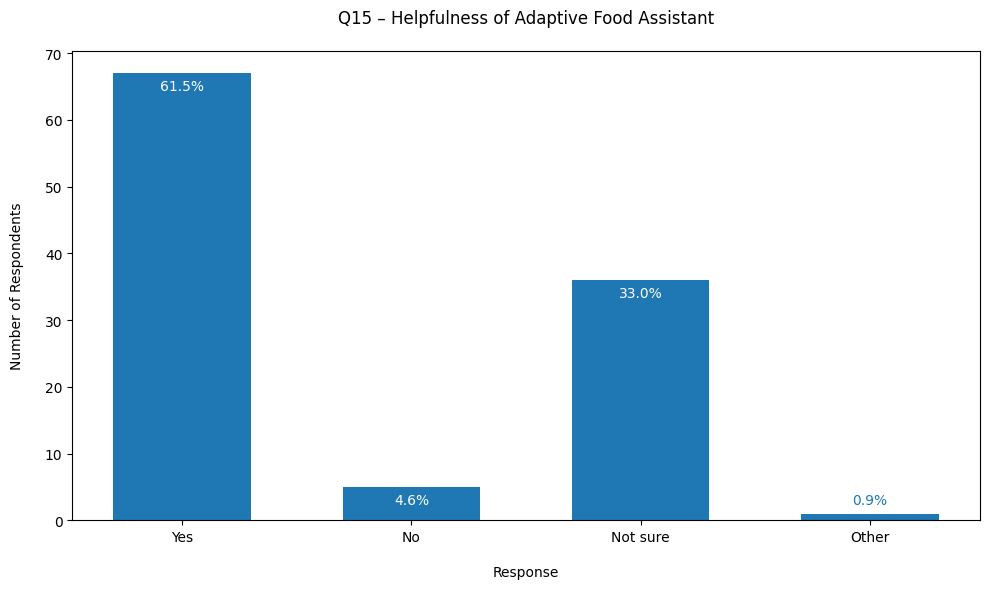

In [102]:
# Q15 – Helpfulness of Adaptive Food Assistant (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q15'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q15 – Helpfulness of Adaptive Food Assistant', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on or above bars
for i, (label, count, perc) in enumerate(zip(mc_results.index, mc_results['Count'], mc_results['Percent'])):
    if label == "Other":
        plt.text(i, count + 1, f"{perc:.1f}%", ha='center', va='bottom', color='#1f77b4')
    else:
        plt.text(i, count - 3, f"{perc:.1f}%", ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q16
-----------------------
                                                Count  Percent
Considers my budget or what food I have            72    66.06
Suggests quick meals when I'm busy                 72    66.06
Adapts to my daily schedule or workload            69    63.30
Lets me rate or respond to each recommendation     50    45.87
Checks how I feel before suggesting food           26    23.85
-----------------------


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


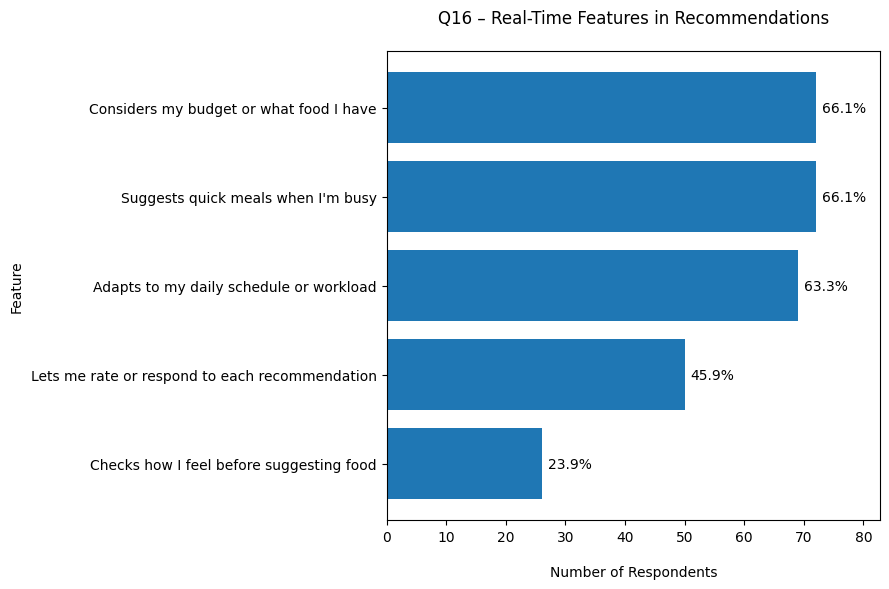

In [103]:
# Q16 – Real-Time Features in Recommendations (Checkboxes)
# Cross-analysis count: 0

qid = 'Q16'

filtered, others, dummies, df_updated = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = df_updated

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q16 – Real-Time Features in Recommendations', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


Quantitative results for Q17
-----------------------
                                           Count  Percent
Healthier snack suggestions                   66    60.55
Tracking meals or consistency                 57    52.29
Setting flexible daily goals                  48    44.04
Gentle reminders                              38    34.86
Celebrating small successes                   34    31.19
Challenges with friends or study groups       26    23.85
Motivational messages based on how I feel     25    22.94
Other                                          3     2.75
-----------------------


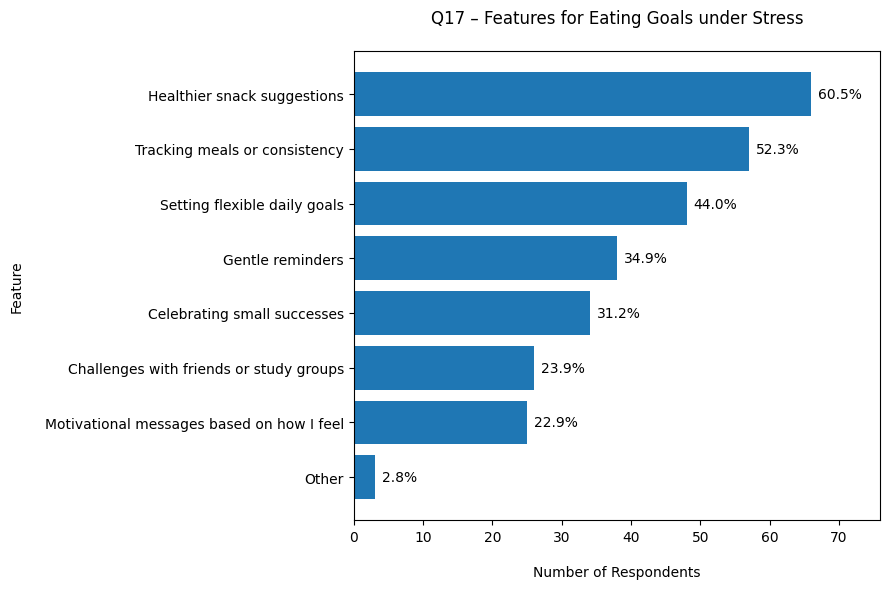

In [104]:
# Q17 – Features for Eating Goals under Stress (Checkboxes)
# Cross-analysis count: 0

qid = 'Q17'

filtered, others, dummies, df_updated = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = df_updated

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q17 – Features for Eating Goals under Stress', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=15)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q18
-----------------------
             Count  Percent
Q18_labeled                
Not at all      11    10.09
Slightly        15    13.76
Moderately      36    33.03
Mostly          34    31.19
Completely      13    11.93
-----------------------
Mean: 3.21
Median: 3.0
Standard Deviation: 1.14
Percentage rating '4' or '5': 43.1%
Percentage rating '1' or '2': 23.9%


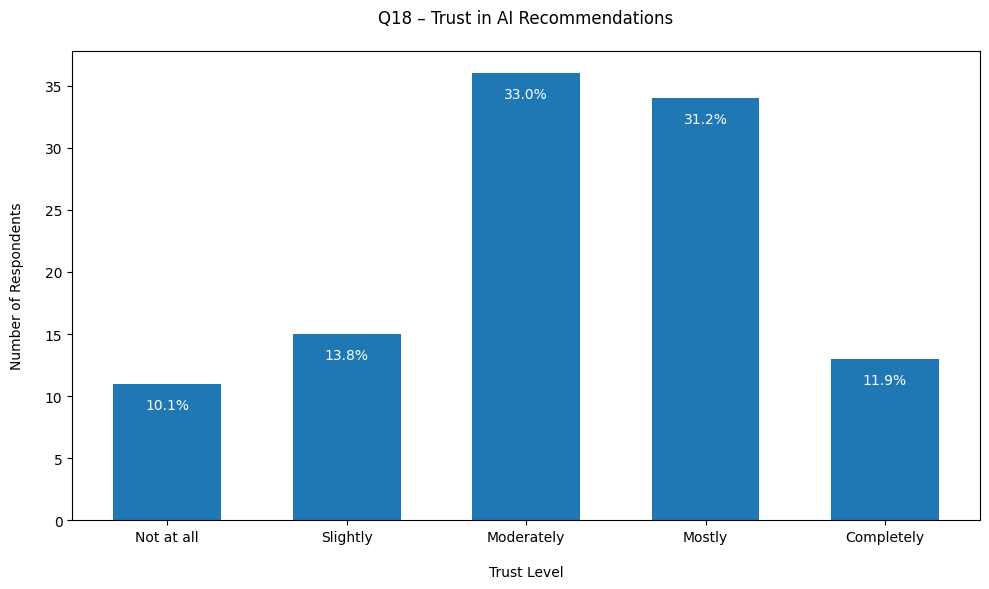

In [105]:
# Q18 – Trust in AI Recommendations (Likert Scale)
# Cross-analysis count: 0

qid = 'Q18'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q18 – Trust in AI Recommendations', pad=20)
plt.xlabel('Trust Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q19
-----------------------
          Count  Percent
Q19                     
Yes          82    75.23
No            8     7.34
Not sure     18    16.51
Other         1     0.92
-----------------------


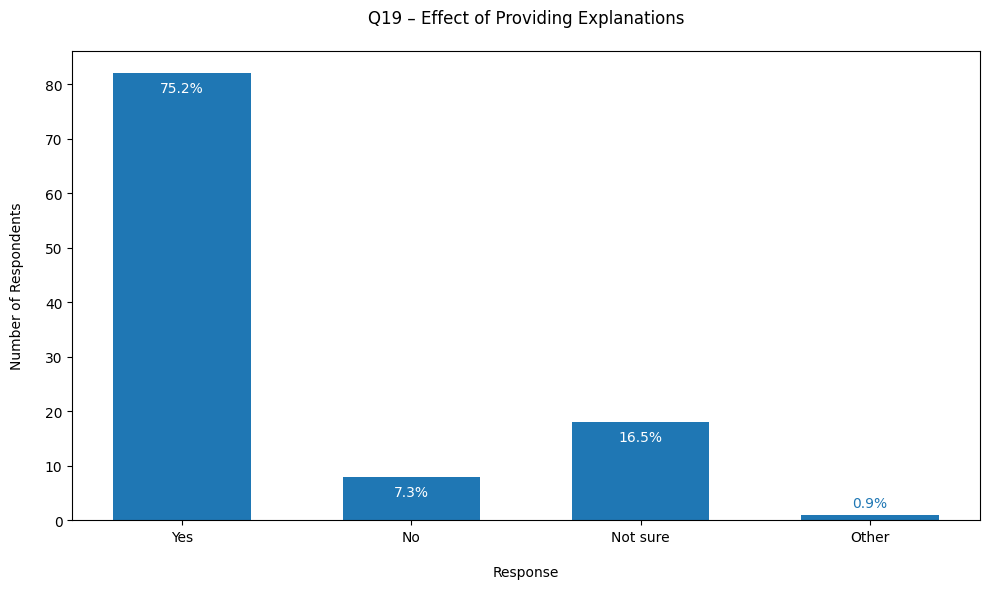

In [106]:
# Q19 – Effect of Providing Explanations (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q19'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q19 – Effect of Providing Explanations', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on or above bars
for i, (label, count, perc) in enumerate(zip(mc_results.index, mc_results['Count'], mc_results['Percent'])):
    if label == "Other":
        plt.text(i, count + 1, f"{perc:.1f}%", ha='center', va='bottom', color='#1f77b4')
    else:
        plt.text(i, count - 4, f"{perc:.1f}%", ha='center', va='bottom', color='white')


plt.tight_layout()
plt.show()

Quantitative results for Q20
-----------------------
                                                    Count  Percent
It gives a scientific or nutritional reason for...     67    61.47
It fits my current routine or schedule                 57    52.29
It allows me to give feedback on suggestions           56    51.38
It matches my dietary needs                            54    49.54
It builds on what I’ve chosen before                   51    46.79
It reflects my mood or energy level                    29    26.61
It uses friendly or human-like language                28    25.69
Other                                                   5     4.59
-----------------------


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


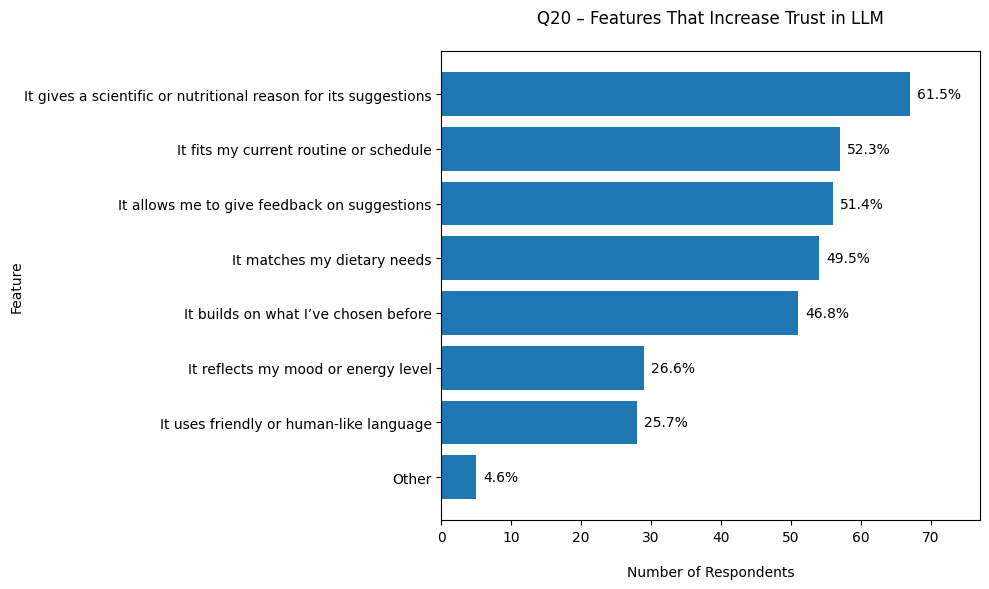

In [107]:
# Q20 – Features That Increase Trust in LLM (Checkboxes)
# Cross-analysis count: 0

qid = 'Q20'

filtered, others, dummies, df_updated = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = df_updated

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(10,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q20 – Features That Increase Trust in LLM', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=0)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


56 responses for Q21
-----------------------
Quantitative results for Q21
-----------------------
                            Count  Percent
Q21_labeled                               
No effect                      37    66.07
More reliance under stress      7    12.50
Not sure                        5     8.93
Other                           4     7.14
Less use under stress           2     3.57
Less trust under stress         1     1.79
-----------------------


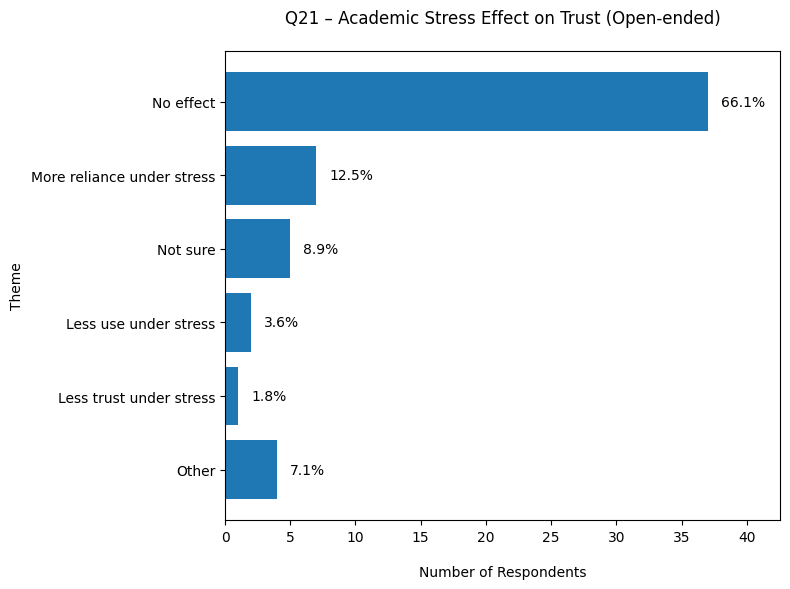

In [108]:
# Q21 - Academic Stress Effect on Trust (Open-ended)
# Finished

qid = 'Q21'

cleaned_q21 = open_ended_block(qid)

df['Q21_cleaned'] = df['Q21'].dropna().str.strip()

themes_df = pd.read_csv("Q21_cleaned_grouped.csv")

print(f"{len(themes_df)} responses for {qid}")
print("-----------------------")

theme_map = dict(zip(themes_df['Response'], themes_df['Theme']))

df['Q21_labeled'] = df['Q21_cleaned'].map(theme_map)

# Counts
counts = df['Q21_labeled'].value_counts()
percent = (counts / counts.sum() * 100).round(2)
q21_results = pd.DataFrame({'Count': counts, 'Percent': percent})

# Get useful responses
useful_responses = themes_df[themes_df['Use in Thesis'] == 'USEFUL']

print(f"Quantitative results for {qid}")
print("-----------------------")
print(q21_results)
print("-----------------------")
""" print("USEFUL responses for Q21:")
print("-----------------------")
for response in useful_responses['Response']:
    print("-", response) """

# Sort by count and move "Other" to the bottom
other_row = q21_results.loc[['Other']]
main_rows = q21_results.drop('Other')
q21_results = pd.concat([
    other_row,
    main_rows.sort_values(by='Count', ascending=True)
])

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(q21_results.index, q21_results['Count'], color='#1f77b4')
plt.title('Q21 – Academic Stress Effect on Trust (Open-ended)', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Theme', labelpad=5)
max_count = q21_results['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, q21_results['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q22
-----------------------
                                        Count  Percent
My dietary needs or preferences            91    83.49
My budget                                  67    61.47
My daily schedule or class timetable       63    57.80
My stress levels                           51    46.79
My sleep patterns                          42    38.53
My emotional state                         32    29.36
Data from wearables or health trackers     29    26.61
Other                                       4     3.67
-----------------------


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


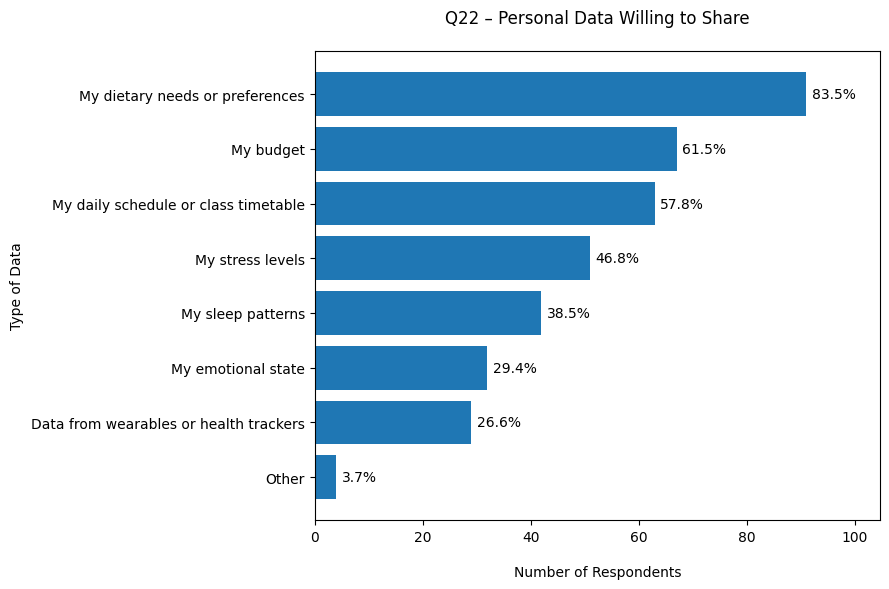

In [109]:
# Q22 – Personal Data Willing to Share (Checkboxes)
# Cross-analysis count: 0

qid = 'Q22'

filtered, others, dummies, df_updated = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = df_updated

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q22 – Personal Data Willing to Share', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Type of Data', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q23
-----------------------
                               Count  Percent
Q23                                          
I’d be more willing               29    26.61
I’d be less willing               25    22.94
It wouldn’t make a difference     35    32.11
Not sure                          15    13.76
Other                              5     4.59
-----------------------


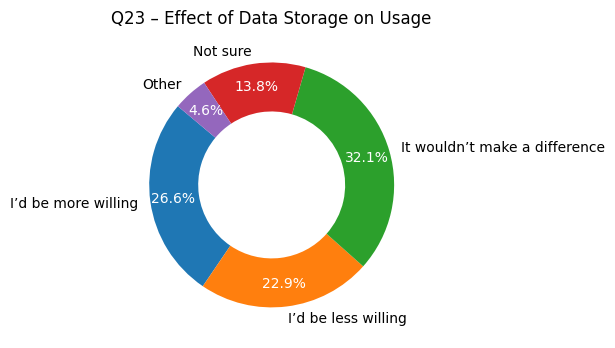

In [110]:
# Q23 – Effect of Data Storage on Usage (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q23'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

""" # Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q23 – Effect of Data Storage on Usage', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show() """

# Plot the results
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.81,
    wedgeprops={'width':0.4}
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q23 – Effect of Data Storage on Usage')
plt.tight_layout()
plt.show()


Quantitative results for Q24
-----------------------
                      Count  Percent
Q24_labeled                         
Not important             4     3.67
Slightly important        6     5.50
Moderately important     15    13.76
Important                21    19.27
Very important           63    57.80
-----------------------
Mean: 4.22
Median: 5.0
Standard Deviation: 1.11
Percentage rating '4' or '5': 77.1%
Percentage rating '1' or '2': 9.2%


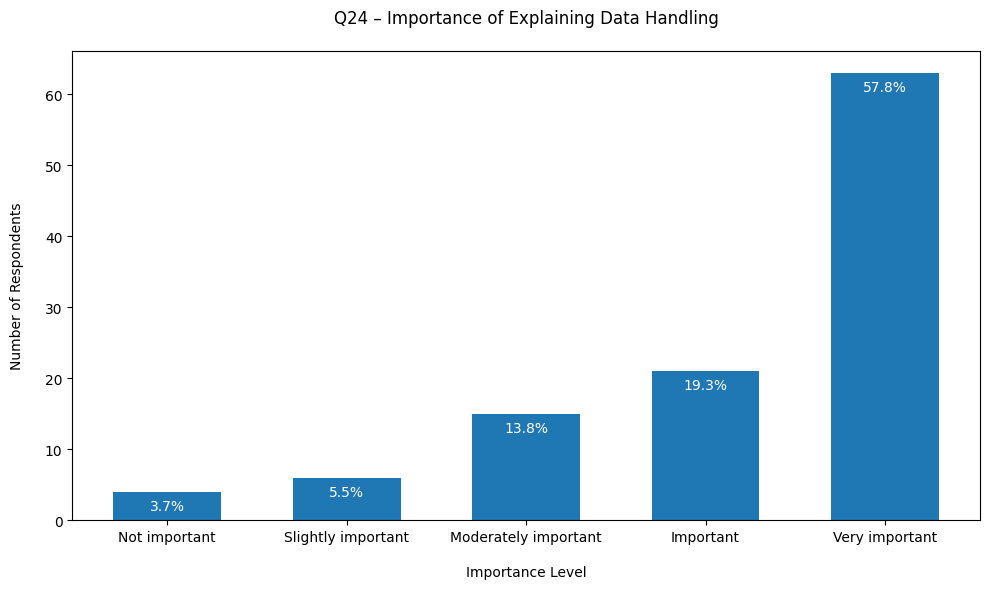

In [111]:
# Q24 – Importance of Explaining Data Handling (Likert Scale)
# Cross-analysis count: 0

qid = 'Q24'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q24 – Importance of Explaining Data Handling', pad=20)
plt.xlabel('Importance Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2.5, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q25
-----------------------
             Count  Percent
Q25                        
More likely     32    29.36
Less likely      7     6.42
No effect       52    47.71
Not sure        14    12.84
Other            4     3.67
-----------------------


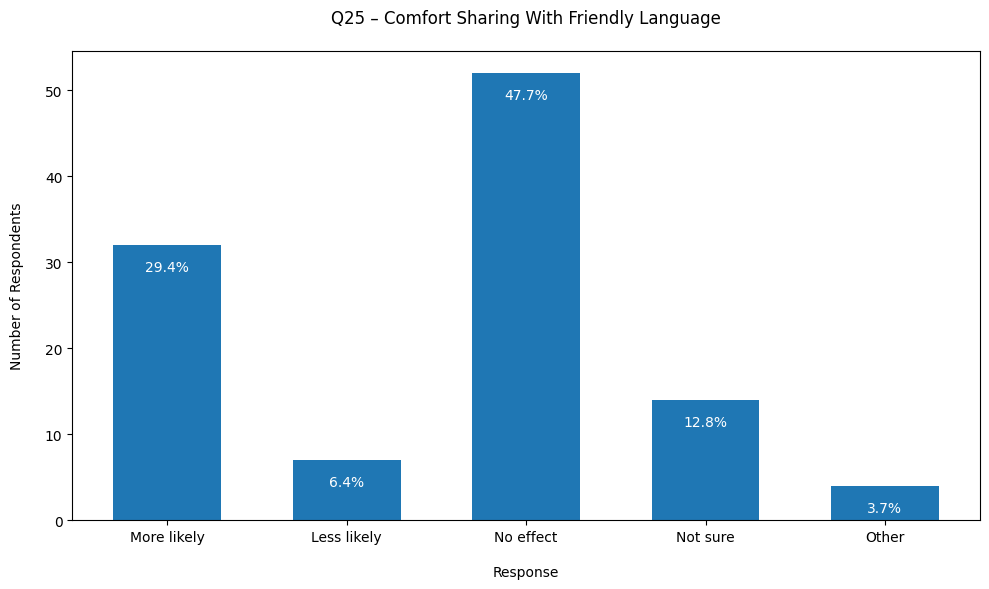

" # Plot the results\nplt.figure(figsize=(6,6))\nwedges, texts, autotexts = plt.pie(\n    mc_results['Count'],\n    labels=mc_results.index,\n    autopct='%1.1f%%',\n    startangle=140,\n    pctdistance=0.81,\n    wedgeprops={'width':0.4}\n)\n\nfor autotext in autotexts:\n    autotext.set_color('white')\n\nplt.title('Q25 – Comfort with Conversational Language')\nplt.tight_layout()\nplt.show() "

In [112]:
# Q25 – Comfort Sharing With Friendly Language (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q25'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q25 – Comfort Sharing With Friendly Language', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()

""" # Plot the results
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.81,
    wedgeprops={'width':0.4}
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q25 – Comfort with Conversational Language')
plt.tight_layout()
plt.show() """


In [113]:
# Q26 – Reasons to Keep Using Food Assistant (Open-ended)
# Finished

qid = 'Q26'

cleaned_q26 = open_ended_block(qid)


Quantitative results for Q27
-----------------------
                                          Count  Percent
Q27                                                     
Yes, many times                              15    13.76
Yes, sometimes                               39    35.78
No, but I’ve used it for other topics        37    33.94
No, I’ve never used tools like ChatGPT       10     9.17
I’ve heard of them, but never tried them      7     6.42
Other                                         1     0.92
-----------------------


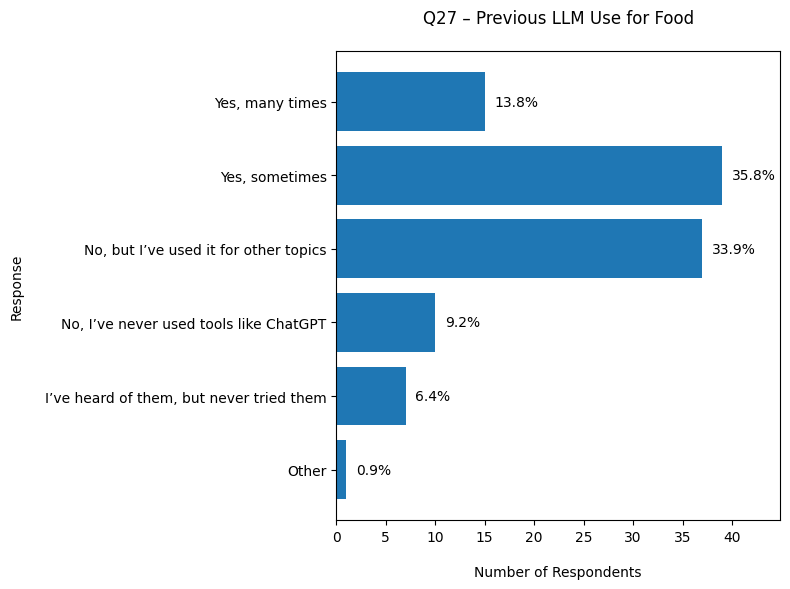

In [114]:
# Q27 – Previous LLM Use for Food (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q27'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Flip the responses
mc_results_flipped = mc_results.iloc[::-1]

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_flipped.index, mc_results_flipped['Count'], color='#1f77b4')
plt.title('Q27 – Previous LLM Use for Food', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Response', labelpad=15)
max_count = mc_results_flipped['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_flipped['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q28
-----------------------
     Count  Percent
Q28                
Yes     54    49.54
No      55    50.46
-----------------------


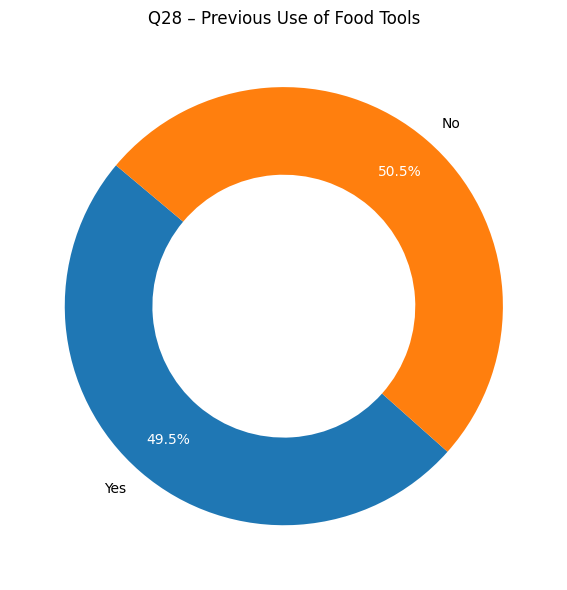

In [115]:
# Q28 – Previous Use of Food Tools (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q28'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    mc_results['Count'],
    labels=mc_results.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.81,
    wedgeprops={'width':0.4}
)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Q28 – Previous Use of Food Tools')
plt.tight_layout()
plt.show()


Quantitative results for Q29
-----------------------
                                                  Count  Percent
Q29                                                             
Yes, often                                            7     6.42
Occasionally                                          7     6.42
Rarely                                                9     8.26
Never                                                27    24.77
Not applicable / I don’t follow such preferences     57    52.29
Other                                                 2     1.83
-----------------------


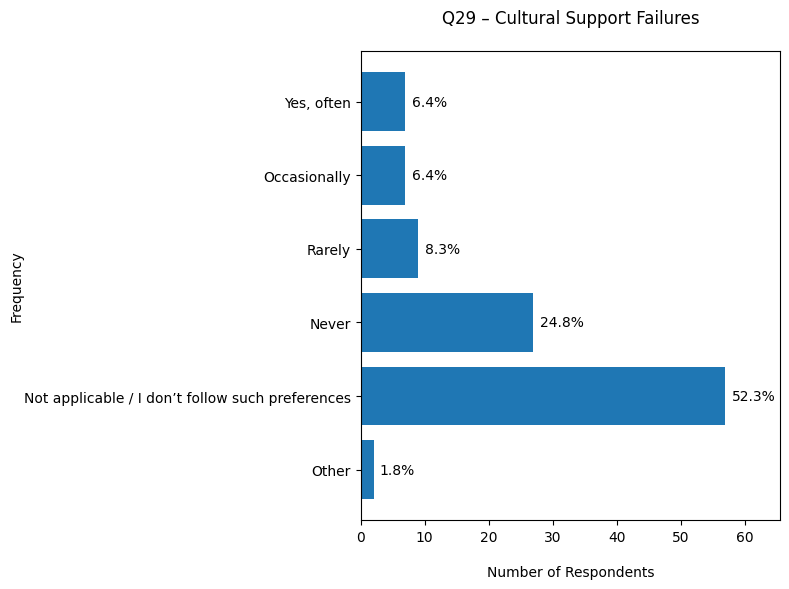

In [116]:
# Q29 – Cultural Support Failures (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q29'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Flip the responses
mc_results_flipped = mc_results.iloc[::-1]

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_flipped.index, mc_results_flipped['Count'], color='#1f77b4')
plt.title('Q29 – Cultural Support Failures', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Frequency', labelpad=0)
max_count = mc_results_flipped['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_flipped['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()

Quantitative results for Q30
-----------------------
          Count  Percent
Q30                     
Yes          24    22.02
No           68    62.39
Not sure     10     9.17
Other         7     6.42
-----------------------


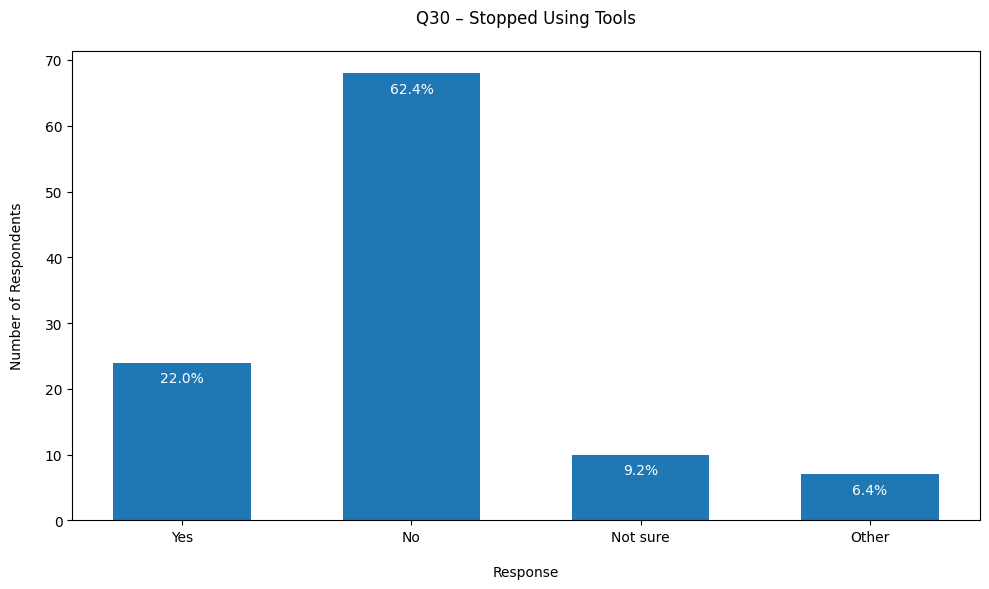

In [117]:
# Q30 – Stopped Using Tools (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q30'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q30 – Stopped Using Tools', pad=20)
plt.xlabel('Response', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(mc_results['Count'], mc_results['Percent'])):
    plt.text(i, count - 3, f"{perc:.1f}%", ha='center', color='white')


plt.tight_layout()
plt.show()


Quantitative results for Q31
-----------------------
                                               Count  Percent
Q31                                                          
A chat-style conversation                         18    16.51
A form where I fill in options and get advice     12    11.01
A mix of both                                     67    61.47
Not sure                                           9     8.26
Other                                              3     2.75
-----------------------


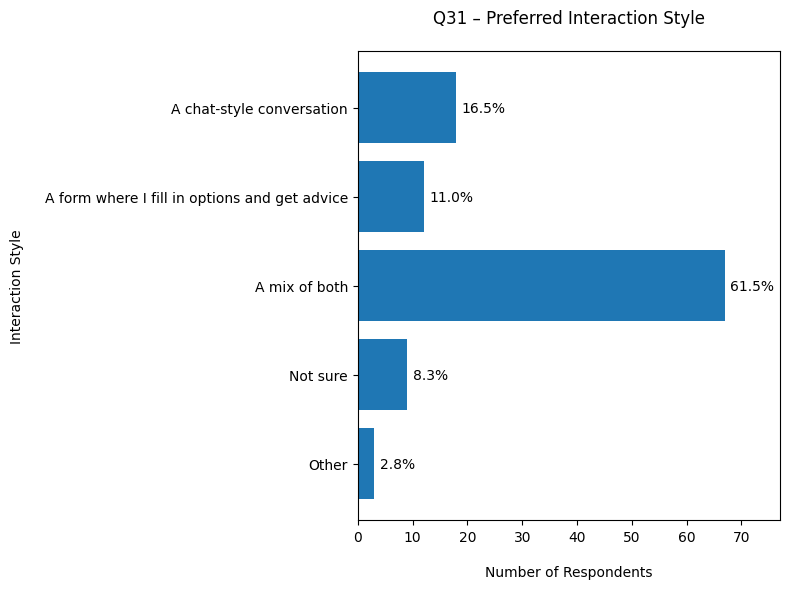

In [118]:
# Q31 – Preferred Interaction Style (Multiple Choice)
# Cross-analysis count: 0

qid = 'Q31'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

mc_results = mc_block(filtered, others, qid)

# Flip the responses
mc_results_flipped = mc_results.iloc[::-1]

# Plot the results
plt.figure(figsize=(8,6))
bars = plt.barh(mc_results_flipped.index, mc_results_flipped['Count'], color='#1f77b4')
plt.title('Q31 – Preferred Interaction Style', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Interaction Style', labelpad=15)
max_count = mc_results_flipped['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, mc_results_flipped['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q32
-----------------------
                      Count  Percent
Q32_labeled                         
Not confident at all      2     1.83
Slightly confident        9     8.26
Moderately confident     24    22.02
Confident                43    39.45
Very confident           31    28.44
-----------------------
Mean: 3.84
Median: 4.0
Standard Deviation: 0.99
Percentage rating '4' or '5': 67.9%
Percentage rating '1' or '2': 10.1%


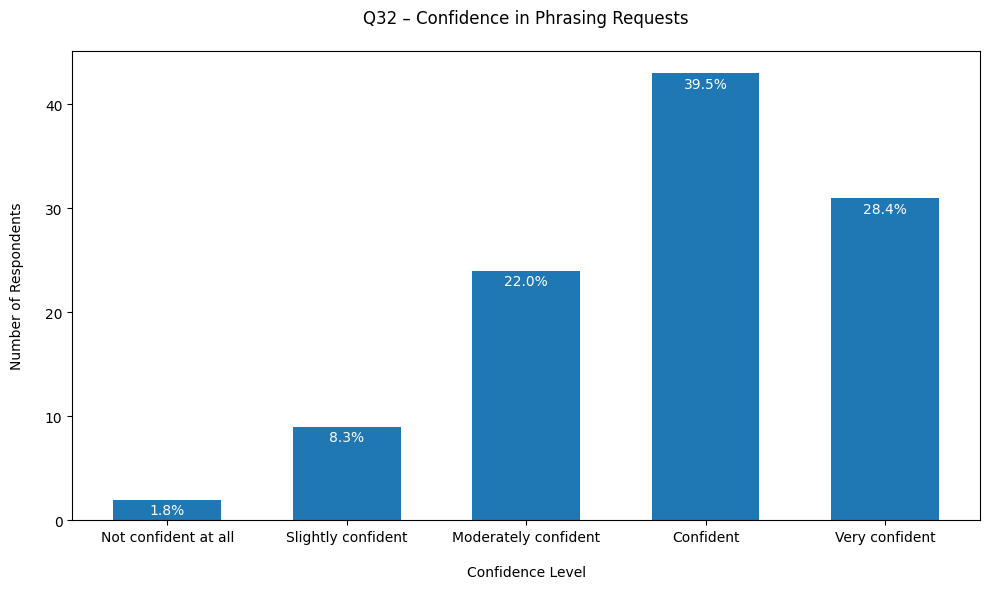

In [119]:
# Q32 – Confidence in Phrasing Requests (Likert Scale)
# Cross-analysis count: 0

qid = 'Q32'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q32 – Confidence in Phrasing Requests', pad=20)
plt.xlabel('Confidence Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 1.4, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q33
-----------------------
                                                    Count  Percent
A helpful conversation that asks clarifying que...     58    53.21
Easy ways to adjust or rewrite my request              56    51.38
Automatic suggestions based on my situation, li...     43    39.45
Pre-written templates to show how to ask a ques...     42    38.53
Step-by-step help for making a request                 36    33.03
Other                                                   1     0.92
-----------------------


C:\Users\lione\AppData\Local\Temp\ipykernel_42816\4066498503.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_prefixed = filtered_prefixed.applymap(lambda x: 'Yes' if x == 1 else 'No')


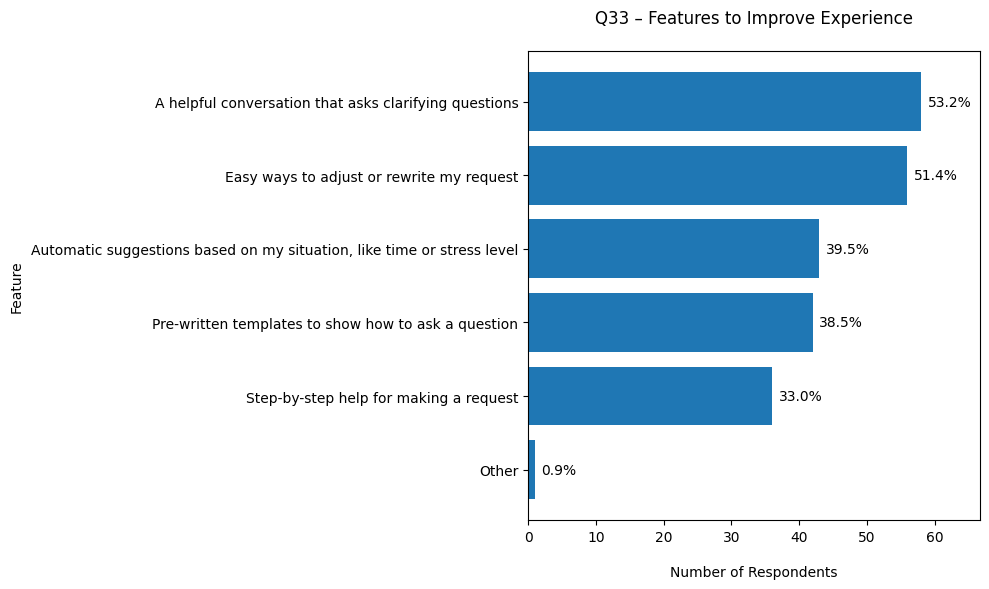

In [120]:
# Q33 – Features to Improve Experience (Checkboxes)
# Cross-analysis count: 0

qid = 'Q33'

filtered, others, dummies, df_updated = process_checkbox(qid, official_options_map[qid], join_to_df=True)

df = df_updated

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count
cb_results_sorted = cb_results.sort_values(by='Count', ascending=True)

# Plot the results
plt.figure(figsize=(10,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q33 – Features to Improve Experience', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Feature', labelpad=5)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


Quantitative results for Q34
-----------------------
             Count  Percent
Q34_labeled                
Not at all       8     7.34
Slightly         9     8.26
Moderately      32    29.36
Very            27    24.77
Very much       33    30.28
-----------------------
Mean: 3.62
Median: 4.0
Standard Deviation: 1.21
Percentage rating '4' or '5': 55.0%
Percentage rating '1' or '2': 15.6%


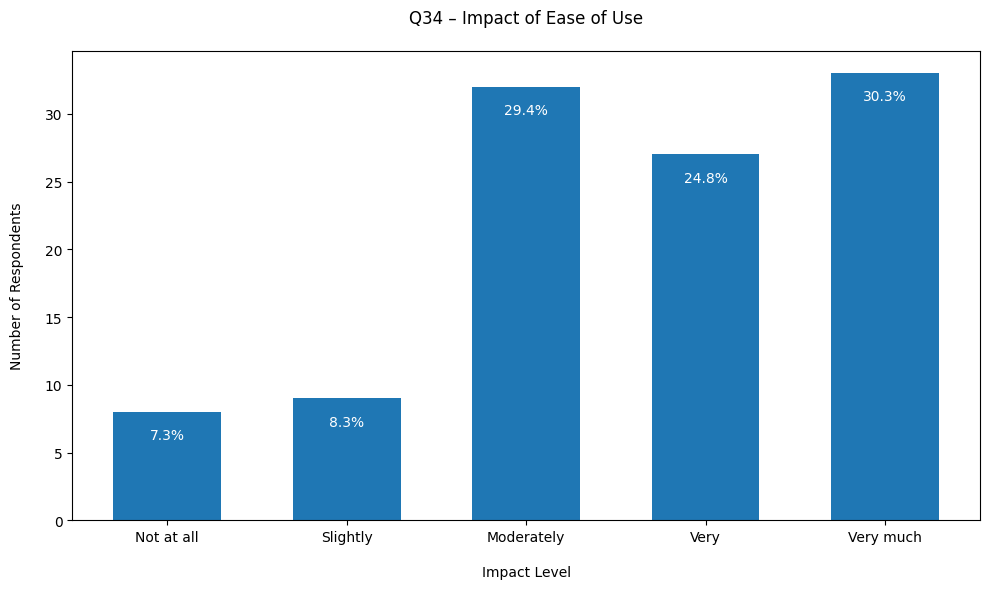

In [121]:
# Q34 – Impact of Ease of Use (Likert Scale)
# Cross-analysis count: 0

qid = 'Q34'

ls_results = ls_block(qid)

calculate_likert_statistics(qid)

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(ls_results.index, ls_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q34 – Impact of Ease of Use', pad=20)
plt.xlabel('Impact Level', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, (count, perc) in enumerate(zip(ls_results['Count'], ls_results['Percent'])):
    plt.text(i, count - 2, f"{perc:.1f}%", ha='center', color='white')

plt.tight_layout()
plt.show()


Quantitative results for Q35
-----------------------
                                   Count  Percent
Rephrase my request and try again     80    73.39
Ask a follow-up to clarify            49    44.95
Stop using it and look elsewhere      16    14.68
Not sure                               2     1.83
Other                                  3     2.75
-----------------------


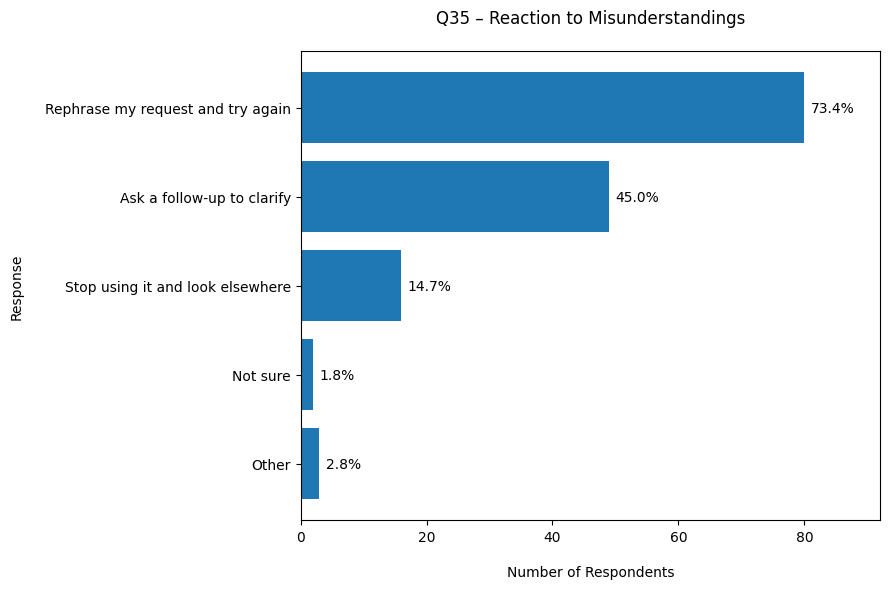

In [122]:
# Q35 – Reaction to Misunderstandings (Checkboxes)
# Cross-analysis count: 0

qid = 'Q35'

filtered, others, dummies = process_checkbox(qid, official_options_map[qid])

cb_results = cb_block(filtered, others, dummies, qid)

# Sort by count and move "Other" to the bottom
other_row = cb_results.loc[['Other']]
main_rows = cb_results.drop('Other')
cb_results_sorted = pd.concat([
    other_row,
    main_rows.sort_values(by='Count', ascending=True)
])

# Plot the results
plt.figure(figsize=(9,6))
bars = plt.barh(cb_results_sorted.index, cb_results_sorted['Count'], color='#1f77b4')
plt.title('Q35 – Reaction to Misunderstandings', pad=20)
plt.xlabel('Number of Respondents', labelpad=15)
plt.ylabel('Response', labelpad=15)
max_count = cb_results_sorted['Count'].max()
plt.xlim(0, max_count * 1.15)

# Add values next to bars
for bar, perc in zip(bars, cb_results_sorted['Percent']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{perc:.1f}%", va='center')

plt.tight_layout()
plt.show()


In [123]:
# Q36 – Desired Improvements (Open-ended)
# Finsihed

qid = 'Q36'

cleaned_q36 = open_ended_block(qid)


In [124]:
# Q37 – Concerns Leading to Avoidance (Open-ended)
# Finished

qid = 'Q37'

cleaned_q37 = open_ended_block(qid)


In [125]:
# Q38 – Final Thoughts (Open-ended)
# Finished

qid = 'Q38'

cleaned_q38 = open_ended_block(qid)


In [126]:
# -------- CROSS-ANALYSIS -------- #

In [127]:
q_labels = {
    "Q1": "Age",
    "Q1_prepped": "Age",
    "Q2": "Gender",
    "Q3": "Level of Study",
    "Q4": "Field of Study",
    "Q4_labeled": "Field of Study",
    "Q5": "Country of Residence",
    "Q6": "Dietary Preferences",
    "Q6_prepped": "Dietary Preferences",
    "Q7": "Eating Habit Changes under Stress",
    "Q7_labeled": "Eating Habit Changes under Stress",
    "Q8": "Specific Eating Changes under Stress",
    "Q9": "Maintain Healthy Eating under Stress",
    "Q9_labeled": "Maintain Healthy Eating under Stress",
    "Q10": "Food Choice Factors under Stress",
    "Q11": "Importance of Dietary Alignment",
    "Q11_labeled": "Importance of Dietary Alignment",
    "Q12": "Importance of Mood Alignment",
    "Q12_labeled": "Importance of Mood Alignment",
    "Q13": "Preferred Personalization",
    "Q14": "Mood Effects on Food Choices",
    "Q14_prepped": "Mood Effects on Food Choices",
    "Q15": "Helpfulness of Adaptive Food Assistant",
    "Q15_prepped": "Helpfulness of Adaptive Food Assistant",
    "Q16": "Real-Time Features in Recommendations",
    "Q17": "Features for Eating Goals under Stress",
    "Q18": "Trust in LLM Recommendations",
    "Q18_labeled": "Trust in LLM Recommendations",
    "Q19": "Effect of Providing Explanations",
    "Q19_prepped": "Effect of Providing Explanations",
    "Q20": "Features That Increase Trust in LLM",
    "Q21": "Academic Stress Effect on Trust",
    "Q21_cleaned": "Academic Stress Effect on Trust",
    "Q21_labeled": "Academic Stress Effect on Trust",
    "Q22": "Personal Data Willing to Share",
    "Q23": "Effect of Data Storage on Usage",
    "Q23_prepped": "Effect of Data Storage on Usage",
    "Q24": "Importance of Explaining Data Handling",
    "Q24_labeled": "Importance of Explaining Data Handling",
    "Q25": "Comfort Sharing With Friendly Language",
    "Q25_prepped": "Comfort Sharing With Friendly Language",
    "Q26": "Reasons to Keep Using Food Assistant",
    "Q27": "Previous LLM Use for Food",
    "Q27_prepped": "Previous LLM Use for Food",
    "Q28": "Previous Use of Food Tools",
    "Q28_prepped": "Previous Use of Food Tools",
    "Q29": "Cultural Support Failures",
    "Q30": "Stopped Using Tools",
    "Q31": "Preferred Interaction Style",
    "Q31_prepped": "Preferred Interaction Style",
    "Q32": "Confidence in Phrasing Requests",
    "Q32_labeled": "Confidence in Phrasing Requests",
    "Q33": "Features to Improve Experience",
    "Q34": "Impact of Ease of Use",
    "Q34_labeled": "Impact of Ease of Use",
    "Q35": "Reaction to Misunderstandings",
    "Q36": "Desired Improvements",
    "Q37": "Concerns Leading to Avoidance",
    "Q38": "Final Thoughts"
}


In [128]:
# Plotting cross-analysis function
def cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_legend=False, flip_xaxis=False):
    cross_tab = pd.crosstab(df[q1_qid], df[q2_qid])

    if flip_xaxis:
        cross_tab = cross_tab.iloc[::-1]

    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    custom_colors = [
        '#4c72b0',
        '#55a868',
        '#c44e52',
        '#8172b2',
        '#ccb974'
    ]

    pd.set_option('display.width', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    print("Counts:\n", cross_tab)
    print("\nPercentages (row-wise):\n", cross_tab_percent.round(1))

    # Plot the results
    if plot == 1:
        # Grouped Bar Chart
        _, ax = plt.subplots(figsize=(11,6))
        
        # Flip Legend if True
        if flip_legend:
            bars = cross_tab[cross_tab.columns[::-1]].plot(kind='bar', ax=ax, width=0.75, color=custom_colors)
        else:
            bars = cross_tab.plot(kind='bar', ax=ax, width=0.75, color=custom_colors)

        ax.legend(title=label_ex)
        ax.set_title(chart_title, pad=20)
        ax.set_xlabel(label_x, labelpad=15)
        ax.set_ylabel('Number of Respondents', labelpad=15)
        ax.tick_params(axis='x', rotation=0)
        y_max = cross_tab.values.max() + 2
        ax.set_ylim(0, y_max)
        ax.set_yticks(range(0, y_max+1, max(1, y_max//6)))

        # Add values on bars
        for container in bars.containers:
            ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

        plt.tight_layout()
        plt.show()

    if plot == 2:
        # Stacked Bar Chart (Percentages)
        _, ax = plt.subplots(figsize=(10,6))
        bars = cross_tab_percent.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            width=0.8,
            color=custom_colors
        )

        ax.set_title(chart_title, pad=20)
        ax.set_xlabel(label_x, labelpad=15)
        ax.set_ylabel('Percentage', labelpad=15)
        ax.tick_params(axis='x', rotation=0)
        ax.legend(title=label_ex, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

        for container in ax.containers:
            for bar, value in zip(container.patches, container.datavalues):
                if value >= 1:
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_y() + bar.get_height() / 2,
                        f"{value:.1f}%",
                        ha='center', va='center',
                        fontsize=9, color='white'
                    )

        plt.tight_layout()
        plt.show()

    if plot == 3:
        # Heatmap
        plt.figure(figsize=(10,6))
        sns.heatmap(cross_tab_percent, annot=True, fmt=".1f", cmap="Blues")
        plt.title(heatmap_title, pad=20)
        plt.xlabel(label_ex, labelpad=15)
        plt.ylabel(label_x, labelpad=20)
        plt.tight_layout()
        plt.show()


In [129]:
def prepare_mc_column(column, official_options):
    col = df[column]

    # Replace non official options with "Other"
    col = col.apply(lambda x: x if x in official_options else ("Other" if x.strip() != "" else x))

    # Correct order
    categories = official_options.copy()
    categories.append("Other")
    col = pd.Categorical(col, categories=categories, ordered=True)

    return col

# Prepare all relevant multiple choice questions
df['Q1_prepped'] = prepare_mc_column('Q1', official_options_map['Q1'])
df['Q6_prepped'] = prepare_mc_column('Q6', official_options_map['Q6'])
df['Q15_prepped'] = prepare_mc_column('Q15', official_options_map['Q15'])
df['Q19_prepped'] = prepare_mc_column('Q19', official_options_map['Q19'])
df['Q23_prepped'] = prepare_mc_column('Q23', official_options_map['Q23'])
df['Q27_prepped'] = prepare_mc_column('Q27', official_options_map['Q27'])
df['Q31_prepped'] = prepare_mc_column('Q31', official_options_map['Q31'])

df['Q14_prepped'] = prepare_mc_column('Q14', official_options_map['Q14'])
df['Q25_prepped'] = prepare_mc_column('Q25', official_options_map['Q25'])
df['Q28_prepped'] = prepare_mc_column('Q28', official_options_map['Q28'])

Counts:
 Q9_labeled   Not difficult at all  Slightly difficult  Moderately difficult  Very difficult  Extremely difficult
Q1_prepped                                                                                                      
Under 21                        2                   2                     0               4                    1
21 – 23                         1                   9                     7               5                    2
24 – 26                         5                  11                    11              13                    8
27 or older                     3                   3                     8               9                    5

Percentages (row-wise):
 Q9_labeled   Not difficult at all  Slightly difficult  Moderately difficult  Very difficult  Extremely difficult
Q1_prepped                                                                                                      
Under 21                     22.2                22.2        

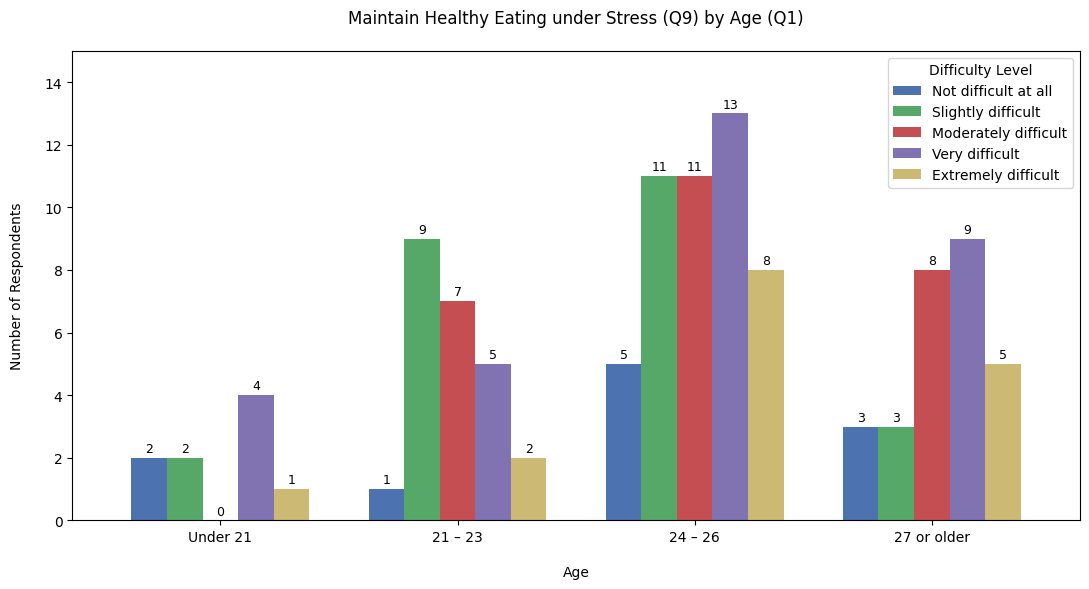

In [130]:
# QX vs QX - Cross-analysis

q1_qid = 'Q1_prepped'
q2_qid = 'Q9_labeled'
label_ex = 'Difficulty Level'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q18_labeled        Not at all  Slightly  Moderately  Mostly  Completely
Q2                                                                     
Female                      2         9          15      17           6
Male                        8         5          20      17           7
Non-binary                  1         0           1       0           0
Prefer not to say           0         1           0       0           0

Percentages (row-wise):
 Q18_labeled        Not at all  Slightly  Moderately  Mostly  Completely
Q2                                                                     
Female                    4.1      18.4        30.6    34.7        12.2
Male                     14.0       8.8        35.1    29.8        12.3
Non-binary               50.0       0.0        50.0     0.0         0.0
Prefer not to say         0.0     100.0         0.0     0.0         0.0


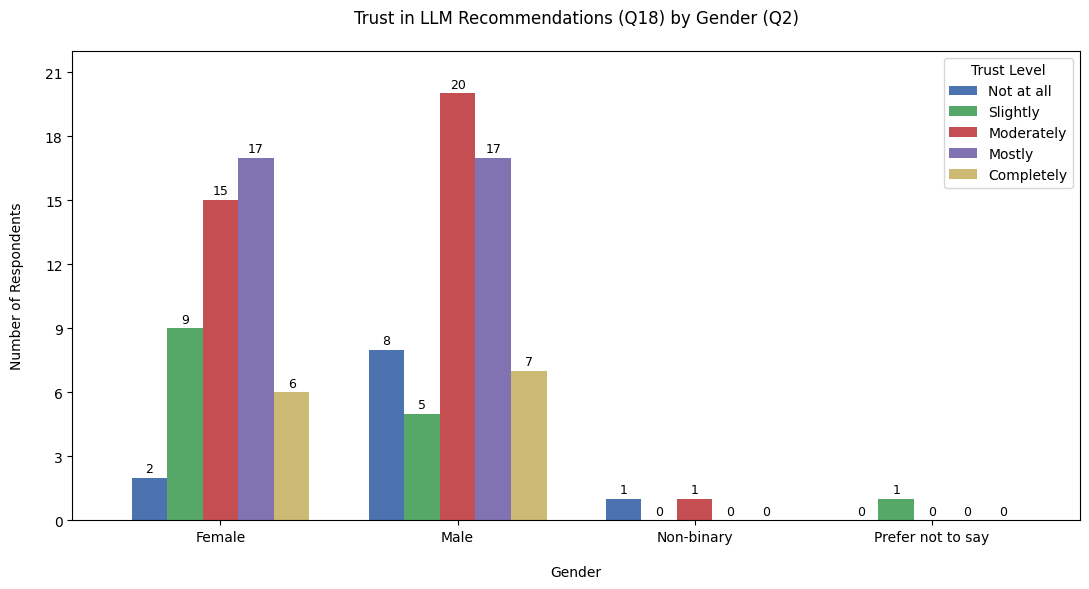

In [131]:
# QX vs QX - Cross-analysis

q1_qid = 'Q2'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q7_labeled               Never  Rarely  Sometimes  Often  Always
Q3                                                              
BTS                          0       0          1      2       0
Bachelor                     3       8          8     12       6
Master                       8       6         13     17      15
PhD or Doctoral studies      0       3          3      3       1

Percentages (row-wise):
 Q7_labeled               Never  Rarely  Sometimes  Often  Always
Q3                                                              
BTS                        0.0     0.0       33.3   66.7     0.0
Bachelor                   8.1    21.6       21.6   32.4    16.2
Master                    13.6    10.2       22.0   28.8    25.4
PhD or Doctoral studies    0.0    30.0       30.0   30.0    10.0


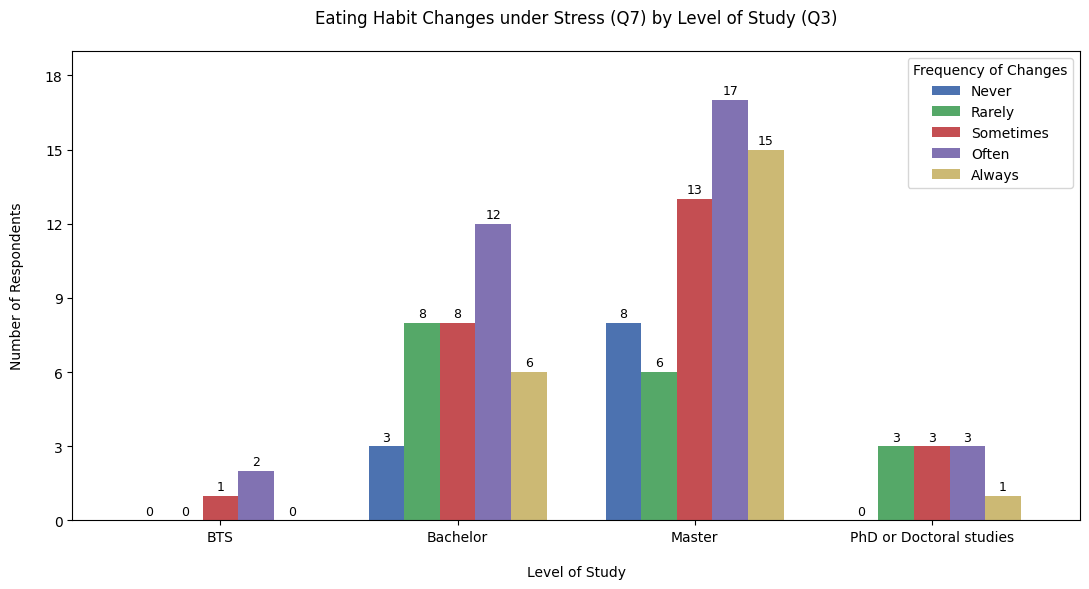

In [132]:
# QX vs QX - Cross-analysis

q1_qid = 'Q3'
q2_qid = 'Q7_labeled'
label_ex = 'Frequency of Changes'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q18_labeled              Not at all  Slightly  Moderately  Mostly  Completely
Q3                                                                           
BTS                               0         0           1       2           0
Bachelor                          3         7          13      12           2
Master                            5         7          19      18          10
PhD or Doctoral studies           3         1           3       2           1

Percentages (row-wise):
 Q18_labeled              Not at all  Slightly  Moderately  Mostly  Completely
Q3                                                                           
BTS                             0.0       0.0        33.3    66.7         0.0
Bachelor                        8.1      18.9        35.1    32.4         5.4
Master                          8.5      11.9        32.2    30.5        16.9
PhD or Doctoral studies        30.0      10.0        30.0    20.0        10.0


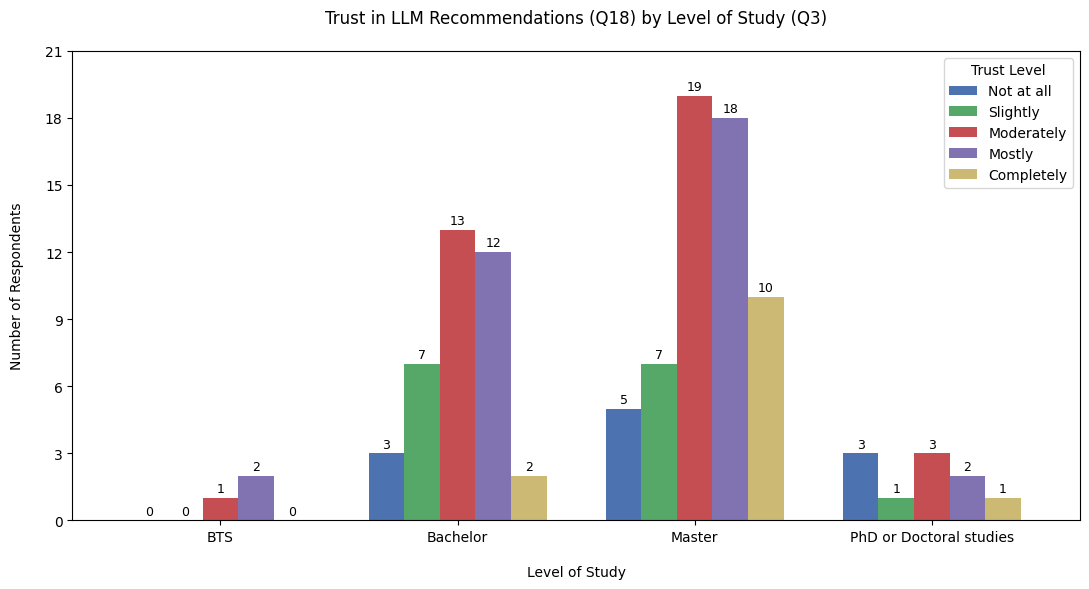

In [133]:
# QX vs QX - Cross-analysis

q1_qid = 'Q3'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q13_Energy or focus levels    No  Yes
Q4_labeled                           
Business & Economics           8   12
Creative & Design              1    2
Health & Life Sciences         8   17
STEM                          28   21
Social Sciences & Humanities   5    7

Percentages (row-wise):
 Q13_Energy or focus levels      No   Yes
Q4_labeled                              
Business & Economics          40.0  60.0
Creative & Design             33.3  66.7
Health & Life Sciences        32.0  68.0
STEM                          57.1  42.9
Social Sciences & Humanities  41.7  58.3


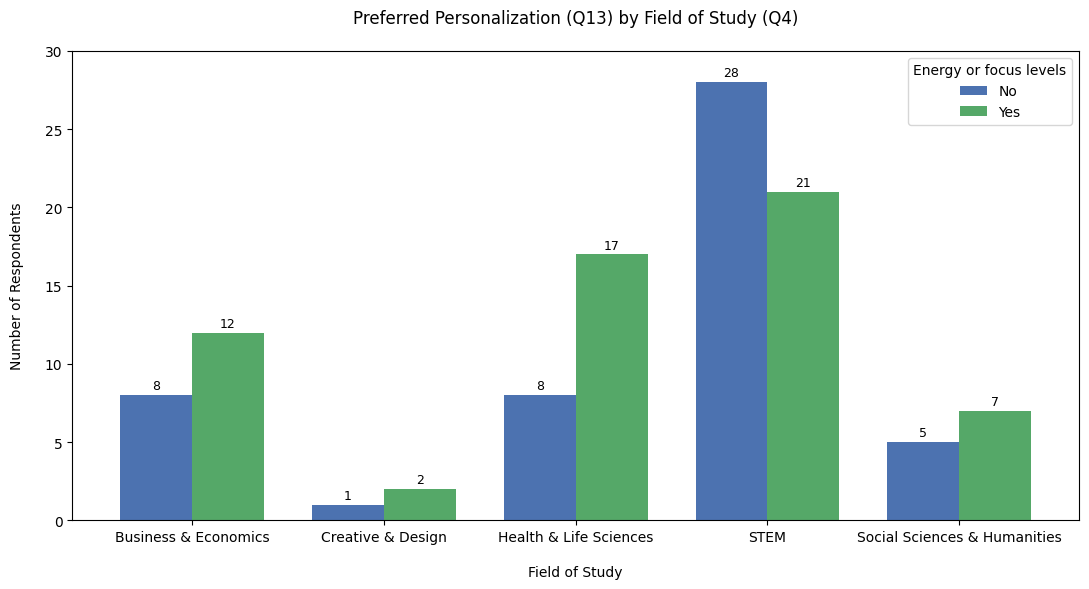

In [134]:
# QX vs QX - Cross-analysis

""" Q13_
- Nutritional goals
- Mood or emotional state
- Energy or focus levels
- Cultural food preferences
- Budget constraints
- Sleep or physical health
- Device data, like wearables
- Religious or ethical preferences
- Available time to cook or eat
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q4_labeled'
q2_qid = 'Q13_Energy or focus levels'
label_ex = name_label(q2_qid)
plot = 1 #3

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q10_Emotional state  No  Yes
Q7_labeled                  
Never                 7    4
Rarely               12    5
Sometimes             7   18
Often                11   23
Always                5   17

Percentages (row-wise):
 Q10_Emotional state    No   Yes
Q7_labeled                     
Never                63.6  36.4
Rarely               70.6  29.4
Sometimes            28.0  72.0
Often                32.4  67.6
Always               22.7  77.3


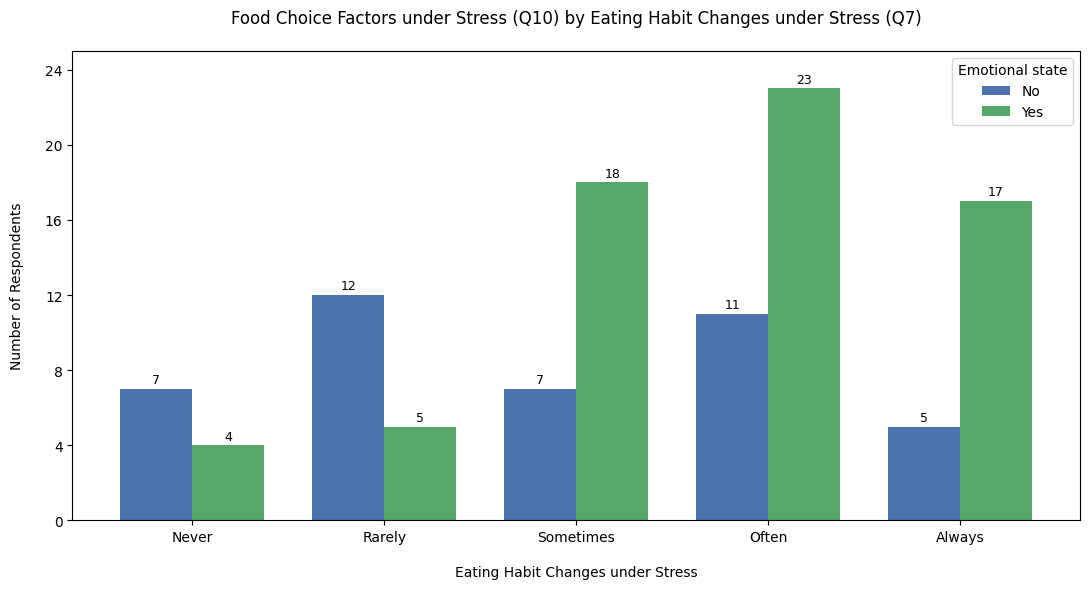

In [135]:
# QX vs QX - Cross-analysis

""" Q10_
- Time availability
- Budget constraints
- Physical wellbeing
- Emotional state
- Social influence
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q7_labeled'
q2_qid = 'Q10_Emotional state'
label_ex = name_label(q2_qid)
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q15_prepped  Yes  No  Not sure  Other
Q7_labeled                           
Never          6   1         4      0
Rarely         7   0         9      1
Sometimes     15   2         8      0
Often         22   1        11      0
Always        17   1         4      0

Percentages (row-wise):
 Q15_prepped   Yes   No  Not sure  Other
Q7_labeled                             
Never        54.5  9.1      36.4    0.0
Rarely       41.2  0.0      52.9    5.9
Sometimes    60.0  8.0      32.0    0.0
Often        64.7  2.9      32.4    0.0
Always       77.3  4.5      18.2    0.0


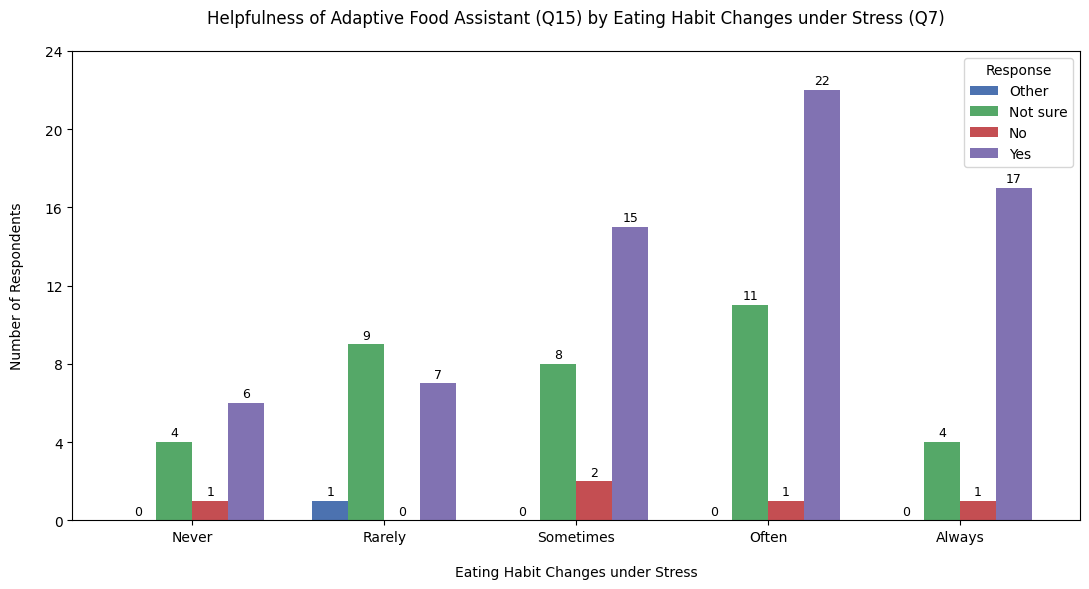

In [136]:
# QX vs QX - Cross-analysis

q1_qid = 'Q7_labeled'
q2_qid = 'Q15_prepped'
label_ex = 'Response'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_legend=True)


Counts:
 Q15_prepped                  Yes  No  Not sure  Other
Q8_I eat at irregular times                          
No                            27   2        25      1
Yes                           40   3        11      0

Percentages (row-wise):
 Q15_prepped                   Yes   No  Not sure  Other
Q8_I eat at irregular times                            
No                           49.1  3.6      45.5    1.8
Yes                          74.1  5.6      20.4    0.0


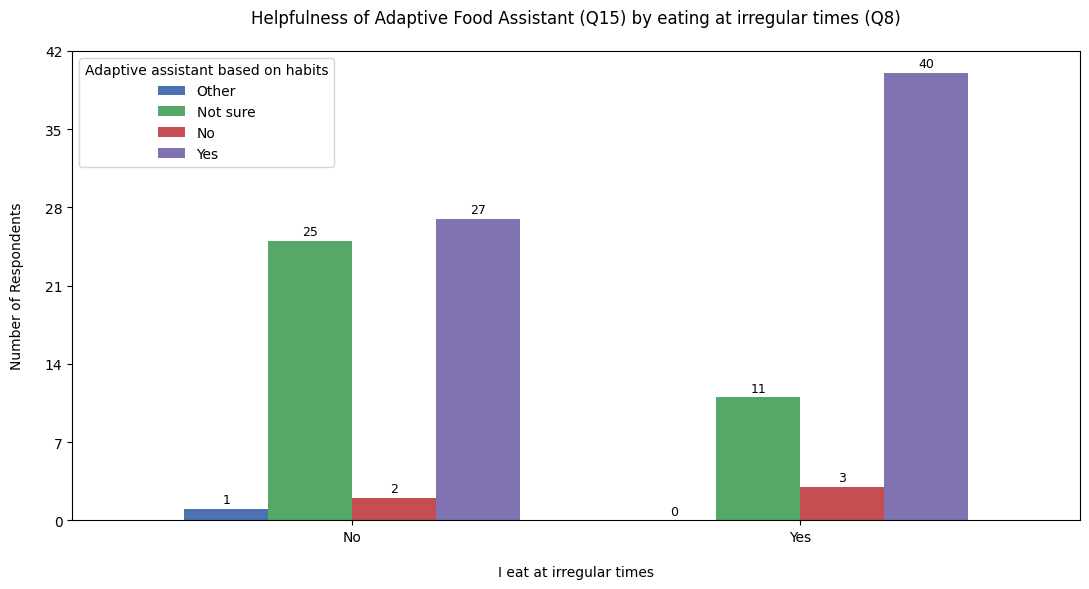

In [137]:
# QX vs QX - Cross-analysis

""" Q8_
- I skip meals
- I crave unhealthy or comfort food
- I snack more often
- I eat at irregular times
- I eat healthier to stay focused 
- No major changes
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q8_I eat at irregular times'
q2_qid = 'Q15_prepped'
label_ex = 'Adaptive assistant based on habits'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by eating at irregular times ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, name_label(q1_qid), plot, chart_title, heatmap_title, label_ex, flip_legend=True)


Counts:
 Q11_labeled           Not important  Slightly important  Moderately important  Important  Very important
Q9_labeled                                                                                              
Not difficult at all              1                   1                     4          2               3
Slightly difficult                5                   5                     5          6               4
Moderately difficult              2                   3                     8          8               5
Very difficult                    4                   3                    12          8               4
Extremely difficult               1                   0                     6          4               5

Percentages (row-wise):
 Q11_labeled           Not important  Slightly important  Moderately important  Important  Very important
Q9_labeled                                                                                              
Not difficult at all

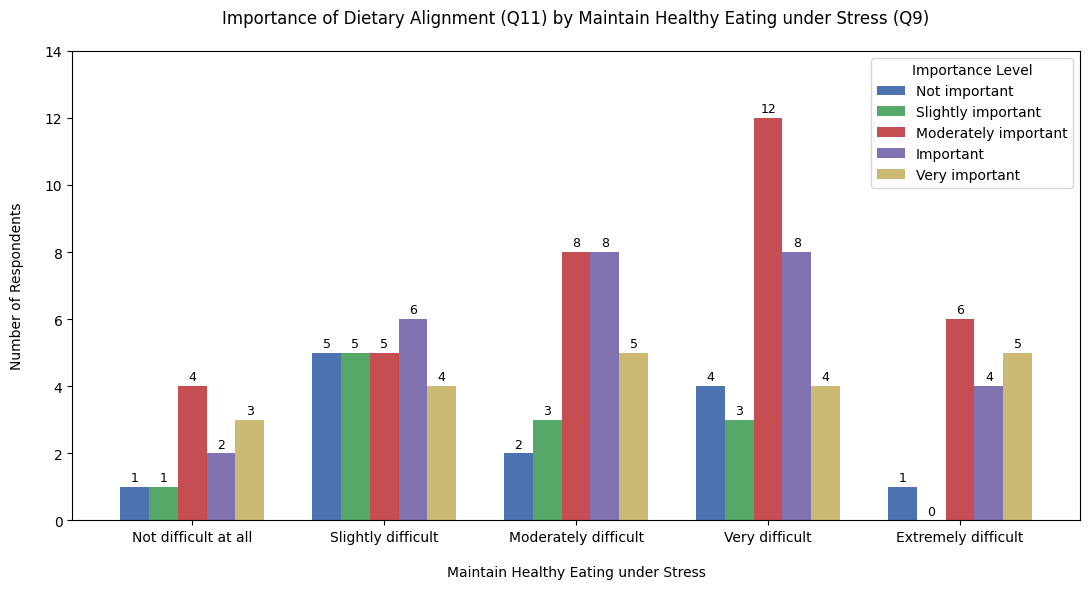

In [138]:
# QX vs QX - Cross-analysis

q1_qid = 'Q9_labeled'
q2_qid = 'Q11_labeled'
label_ex = 'Importance Level'
plot = 1 #3

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q15_prepped           Yes  No  Not sure  Other
Q9_labeled                                    
Not difficult at all    6   0         4      1
Slightly difficult     13   1        11      0
Moderately difficult   17   3         6      0
Very difficult         17   1        13      0
Extremely difficult    14   0         2      0

Percentages (row-wise):
 Q15_prepped            Yes    No  Not sure  Other
Q9_labeled                                       
Not difficult at all  54.5   0.0      36.4    9.1
Slightly difficult    52.0   4.0      44.0    0.0
Moderately difficult  65.4  11.5      23.1    0.0
Very difficult        54.8   3.2      41.9    0.0
Extremely difficult   87.5   0.0      12.5    0.0


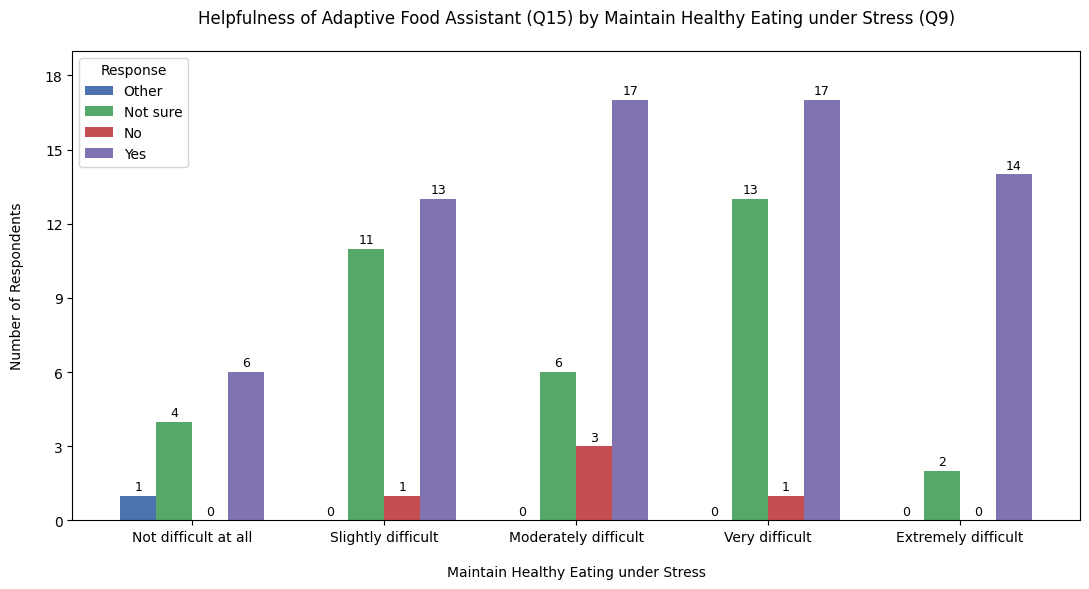

In [139]:
# QX vs QX - Cross-analysis

q1_qid = 'Q9_labeled'
q2_qid = 'Q15_prepped'
label_ex = 'Response'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_legend=True)


Counts:
 Q17_Healthier snack suggestions  No  Yes
Q9_labeled                              
Not difficult at all              7    4
Slightly difficult                8   17
Moderately difficult             10   16
Very difficult                   12   19
Extremely difficult               6   10

Percentages (row-wise):
 Q17_Healthier snack suggestions    No   Yes
Q9_labeled                                 
Not difficult at all             63.6  36.4
Slightly difficult               32.0  68.0
Moderately difficult             38.5  61.5
Very difficult                   38.7  61.3
Extremely difficult              37.5  62.5


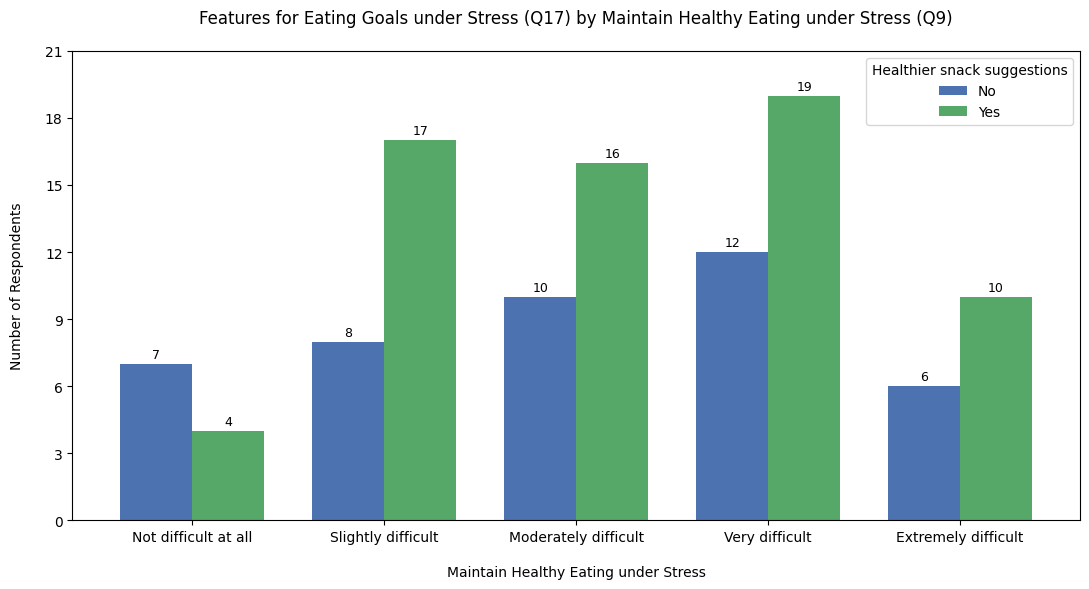

In [140]:
# QX vs QX - Cross-analysis

""" Q17_
- Gentle reminders
- Motivational messages based on how I feel
- Tracking meals or consistency
- Celebrating small successes
- Healthier snack suggestions
- Setting flexible daily goals
- Challenges with friends or study groups
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q9_labeled'
q2_qid = 'Q17_Healthier snack suggestions'
label_ex = name_label(q2_qid)
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q18_labeled           Not at all  Slightly  Moderately  Mostly  Completely
Q11_labeled                                                               
Not important                  4         1           7       1           0
Slightly important             0         2           5       5           0
Moderately important           2         7          11      13           2
Important                      1         2           8      13           4
Very important                 4         3           5       2           7

Percentages (row-wise):
 Q18_labeled           Not at all  Slightly  Moderately  Mostly  Completely
Q11_labeled                                                               
Not important               30.8       7.7        53.8     7.7         0.0
Slightly important           0.0      16.7        41.7    41.7         0.0
Moderately important         5.7      20.0        31.4    37.1         5.7
Important                    3.6       7.1        28.6    46.4   

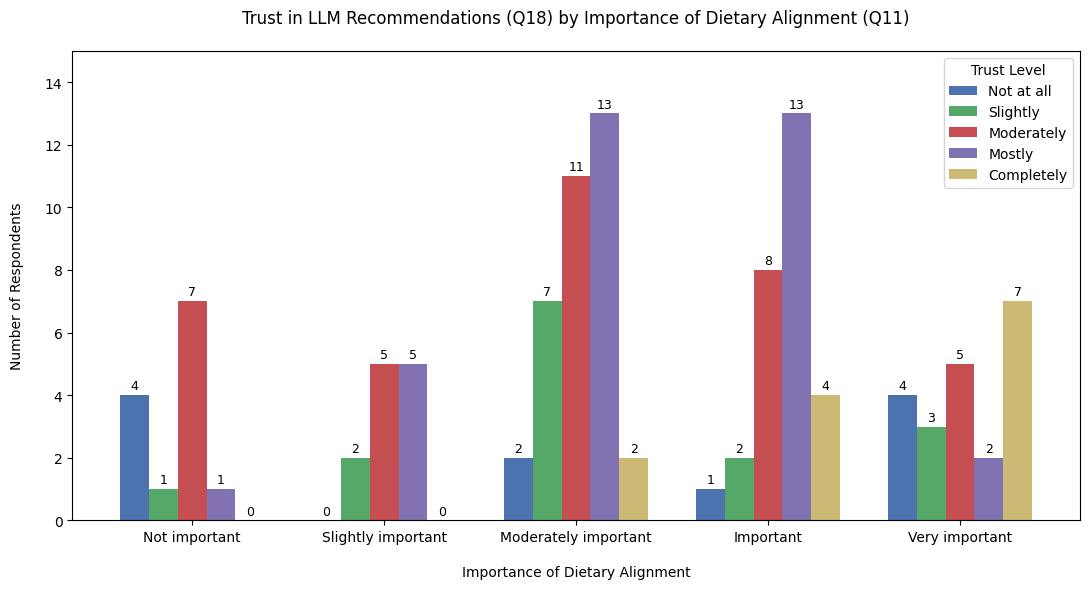

In [141]:
# QX vs QX - Cross-analysis

q1_qid = 'Q11_labeled'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 1 #3

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q13_Mood or emotional state  No  Yes
Q12_labeled                         
Not important                10    0
Slightly important           15    3
Moderately important         30    6
Important                    14   16
Very important                5   10

Percentages (row-wise):
 Q13_Mood or emotional state     No   Yes
Q12_labeled                             
Not important                100.0   0.0
Slightly important            83.3  16.7
Moderately important          83.3  16.7
Important                     46.7  53.3
Very important                33.3  66.7


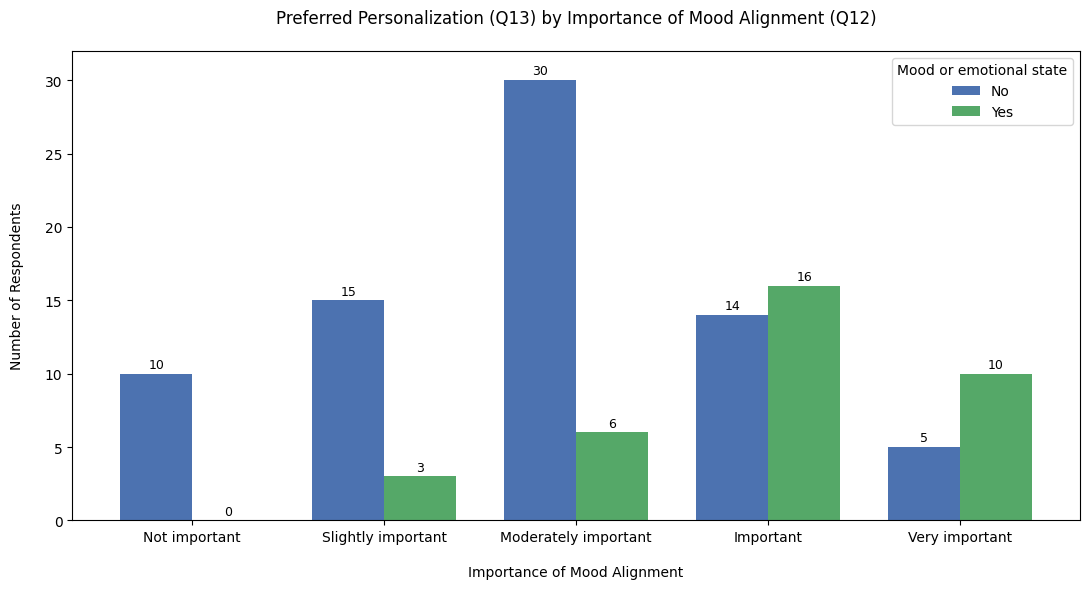

In [142]:
# QX vs QX - Cross-analysis

""" Q13_
- Nutritional goals
- Mood or emotional state
- Energy or focus levels
- Cultural food preferences
- Budget constraints
- Sleep or physical health
- Device data, like wearables
- Religious or ethical preferences
- Available time to cook or eat
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q12_labeled'
q2_qid = 'Q13_Mood or emotional state'
label_ex = name_label(q2_qid)
plot = 1 #3

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q16_Checks how I feel before suggesting food  No  Yes
Q12_labeled                                          
Not important                                  9    1
Slightly important                            15    3
Moderately important                          31    5
Important                                     21    9
Very important                                 7    8

Percentages (row-wise):
 Q16_Checks how I feel before suggesting food    No   Yes
Q12_labeled                                             
Not important                                 90.0  10.0
Slightly important                            83.3  16.7
Moderately important                          86.1  13.9
Important                                     70.0  30.0
Very important                                46.7  53.3


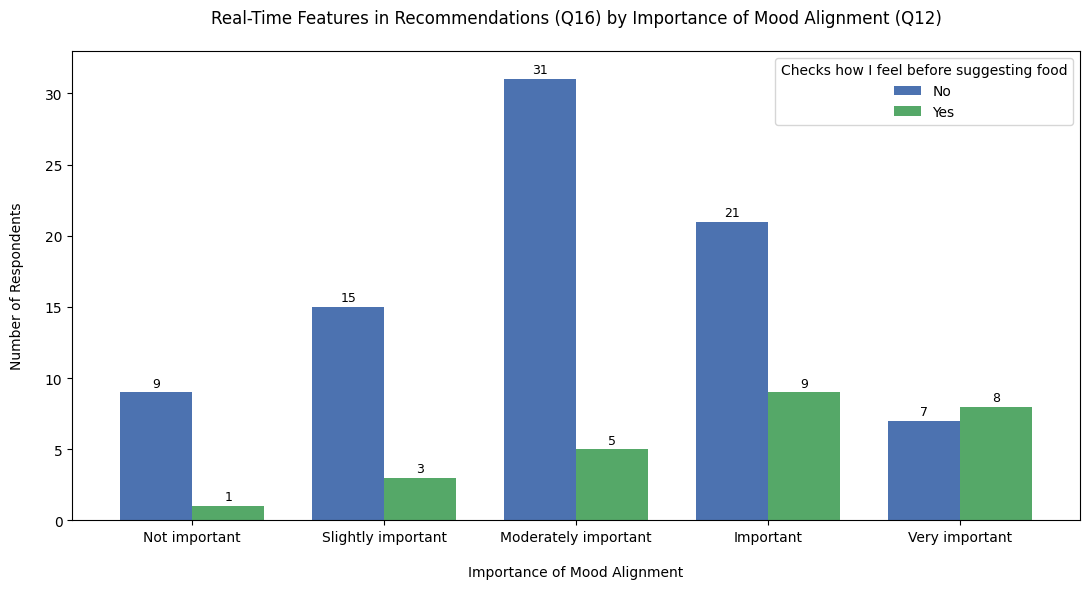

In [143]:
# QX vs QX - Cross-analysis

""" Q16_
- Adapts to my daily schedule or workload
- Considers my budget or what food I have
- Suggests quick meals when I'm busy
- Checks how I feel before suggesting food
- Lets me rate or respond to each recommendation
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q12_labeled'
q2_qid = 'Q16_Checks how I feel before suggesting food'
label_ex = name_label(q2_qid)
plot = 1 #3

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q17_Motivational messages based on how I feel  No  Yes
Q12_labeled                                           
Not important                                  10    0
Slightly important                             15    3
Moderately important                           28    8
Important                                      23    7
Very important                                  8    7

Percentages (row-wise):
 Q17_Motivational messages based on how I feel     No   Yes
Q12_labeled                                               
Not important                                  100.0   0.0
Slightly important                              83.3  16.7
Moderately important                            77.8  22.2
Important                                       76.7  23.3
Very important                                  53.3  46.7


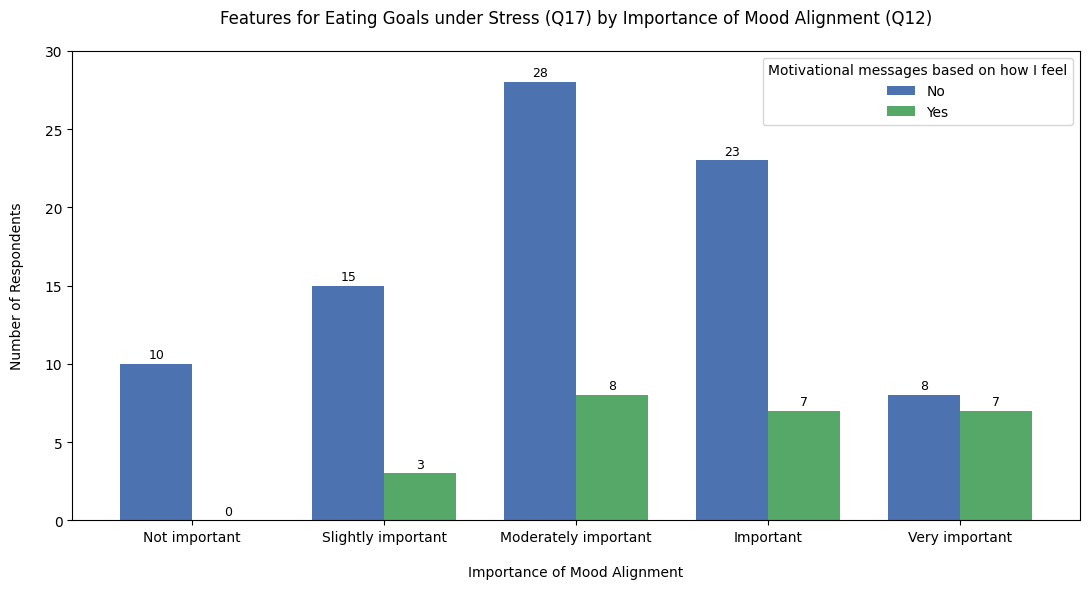

In [144]:
# QX vs QX - Cross-analysis

""" Q17_
- Gentle reminders
- Motivational messages based on how I feel
- Tracking meals or consistency
- Celebrating small successes
- Healthier snack suggestions
- Setting flexible daily goals
- Challenges with friends or study groups
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q12_labeled'
q2_qid = 'Q17_Motivational messages based on how I feel'
label_ex = name_label(q2_qid)
plot = 1 #3

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q22_My budget           No  Yes
Q13_Budget constraints         
No                      33   29
Yes                      9   38

Percentages (row-wise):
 Q22_My budget             No   Yes
Q13_Budget constraints            
No                      53.2  46.8
Yes                     19.1  80.9


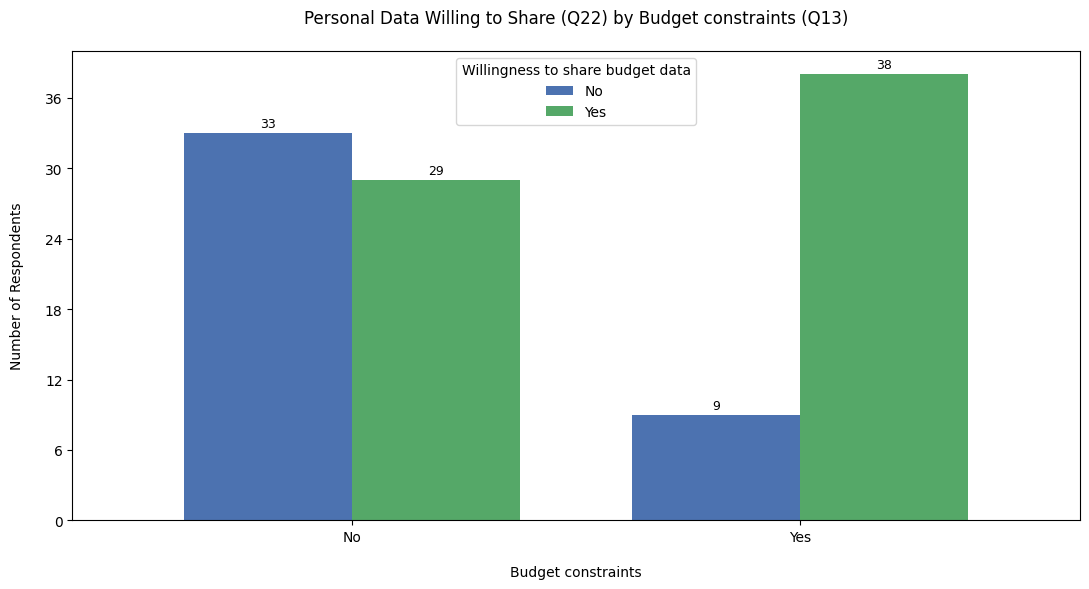

In [145]:
# QX vs QX - Cross-analysis

""" Q13_
- Nutritional goals
- Mood or emotional state
- Energy or focus levels
- Cultural food preferences
- Budget constraints
- Sleep or physical health
- Device data, like wearables
- Religious or ethical preferences
- Available time to cook or eat
 """

""" Q22_
- My dietary needs or preferences
- My stress levels
- My sleep patterns
- My daily schedule or class timetable
- My emotional state
- My budget
- Data from wearables or health trackers
 """

def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q13_Budget constraints'
q2_qid = 'Q22_My budget'
label_ex = 'Willingness to share budget data'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {name_label(q1_qid)} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, name_label(q1_qid), plot, chart_title, heatmap_title, label_ex)


Counts:
 Q18_labeled         Not at all  Slightly  Moderately  Mostly  Completely
Q14_prepped                                                             
Not at all                   2         1           4       3           0
Only a bit                   4         5           5      10           4
Yes                          1         5          18      12           5
Yes, significantly           4         4           9       9           4

Percentages (row-wise):
 Q18_labeled         Not at all  Slightly  Moderately  Mostly  Completely
Q14_prepped                                                             
Not at all                20.0      10.0        40.0    30.0         0.0
Only a bit                14.3      17.9        17.9    35.7        14.3
Yes                        2.4      12.2        43.9    29.3        12.2
Yes, significantly        13.3      13.3        30.0    30.0        13.3


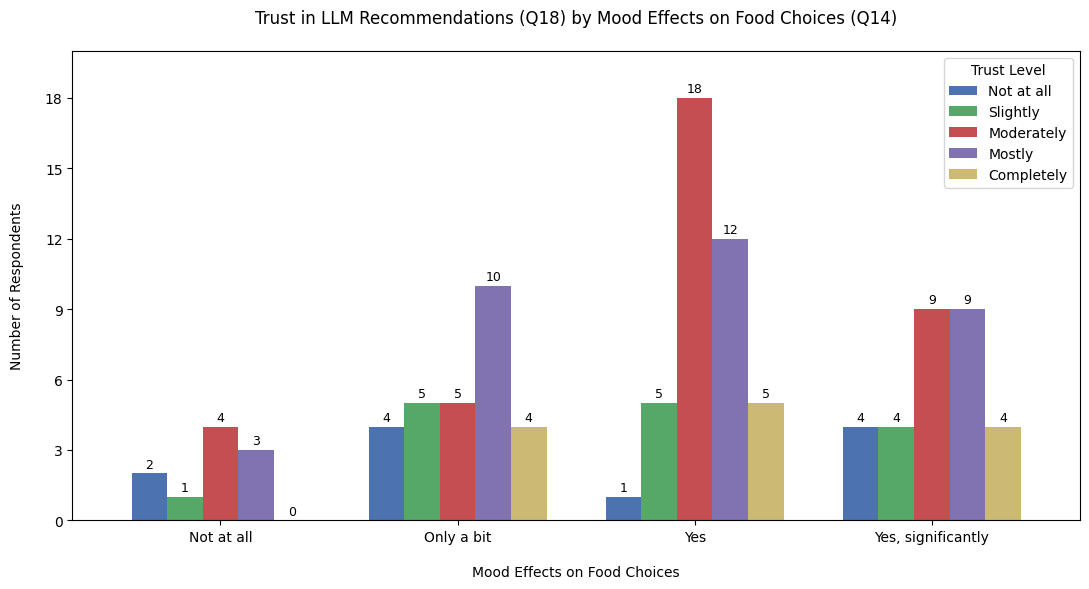

In [146]:
# QX vs QX - Cross-analysis

q1_qid = 'Q14_prepped'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_xaxis=True)


Counts:
 Q19_prepped  Yes  No  Not sure  Other
Q18_labeled                          
Not at all     6   3         2      0
Slightly       7   2         6      0
Moderately    29   1         5      1
Mostly        28   2         4      0
Completely    12   0         1      0

Percentages (row-wise):
 Q19_prepped   Yes    No  Not sure  Other
Q18_labeled                             
Not at all   54.5  27.3      18.2    0.0
Slightly     46.7  13.3      40.0    0.0
Moderately   80.6   2.8      13.9    2.8
Mostly       82.4   5.9      11.8    0.0
Completely   92.3   0.0       7.7    0.0


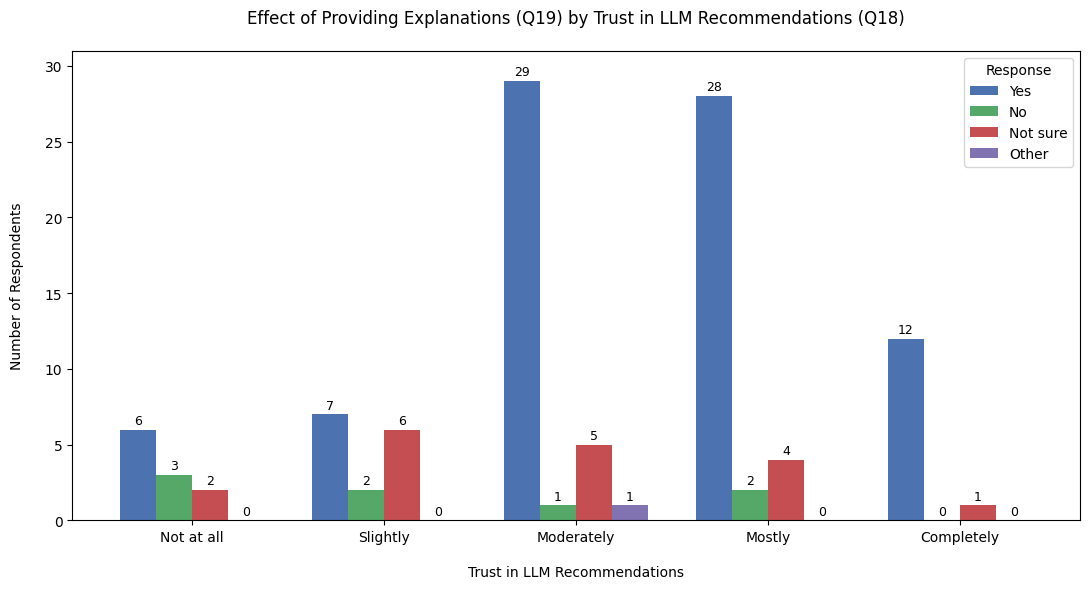

In [147]:
# QX vs QX - Cross-analysis

q1_qid = 'Q18_labeled'
q2_qid = 'Q19_prepped'
label_ex = 'Response'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q23_prepped  I’d be more willing  I’d be less willing  It wouldn’t make a difference  Not sure  Other
Q18_labeled                                                                                          
Not at all                     1                    5                              4         1      0
Slightly                       2                    7                              4         2      0
Moderately                     8                    5                             11         8      4
Mostly                        13                    7                             10         3      1
Completely                     5                    1                              6         1      0

Percentages (row-wise):
 Q23_prepped  I’d be more willing  I’d be less willing  It wouldn’t make a difference  Not sure  Other
Q18_labeled                                                                                          
Not at all                   9.1               

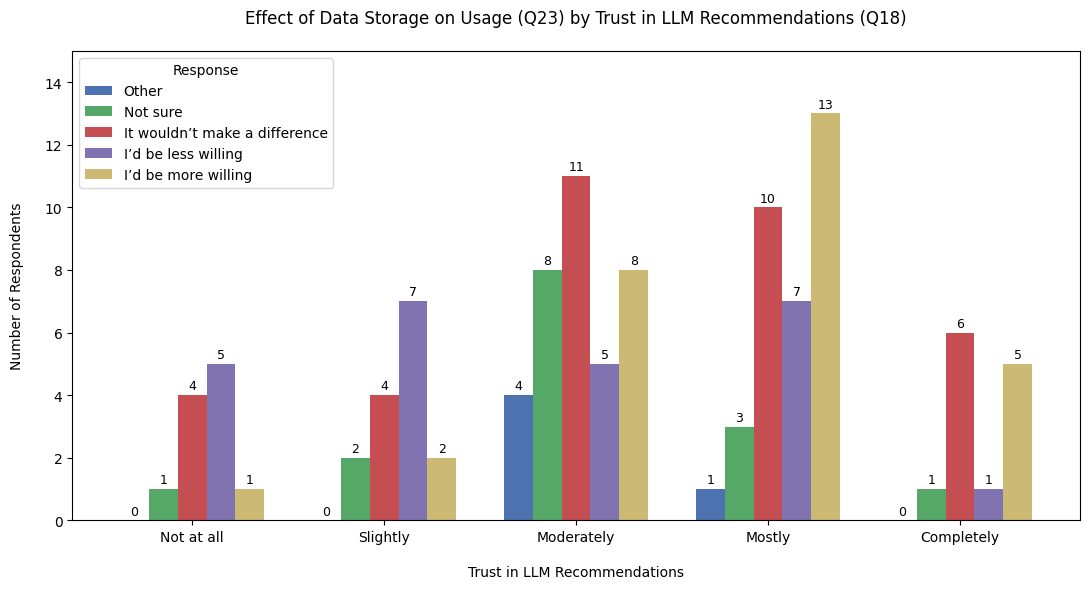

In [148]:
# QX vs QX - Cross-analysis

q1_qid = 'Q18_labeled'
q2_qid = 'Q23_prepped'
label_ex = 'Response'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_legend=True)


Counts:
 Q24_labeled  Not important  Slightly important  Moderately important  Important  Very important
Q18_labeled                                                                                    
Not at all               0                   1                     0          0              10
Slightly                 0                   0                     0          3              12
Moderately               2                   1                     7          6              20
Mostly                   1                   3                     3         10              17
Completely               1                   1                     5          2               4

Percentages (row-wise):
 Q24_labeled  Not important  Slightly important  Moderately important  Important  Very important
Q18_labeled                                                                                    
Not at all             0.0                 9.1                   0.0        0.0            90.9
Sligh

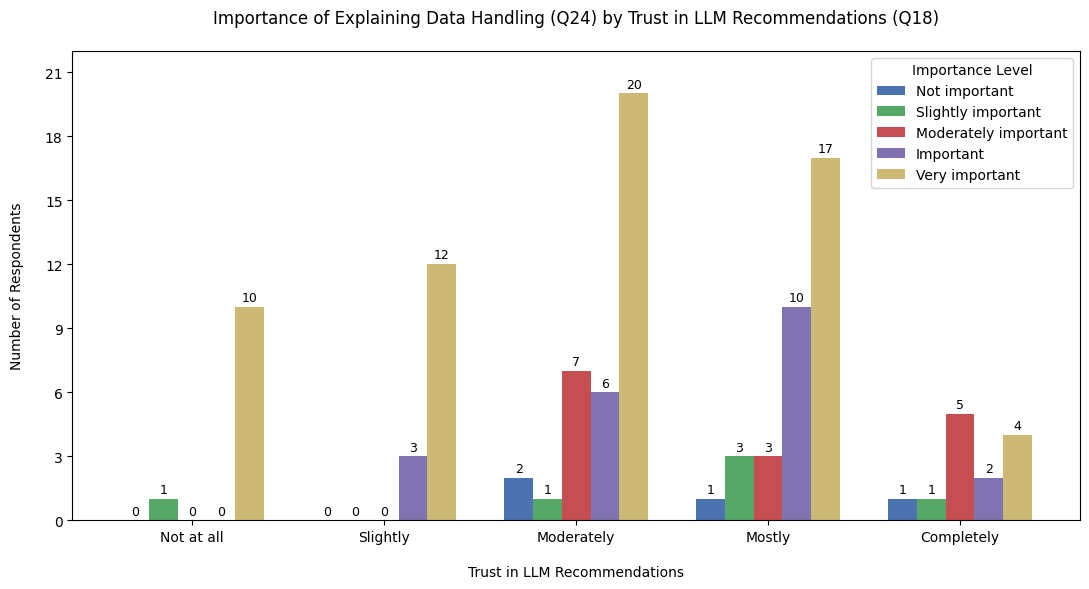

In [149]:
# QX vs QX - Cross-analysis

q1_qid = 'Q18_labeled'
q2_qid = 'Q24_labeled'
label_ex = 'Importance Level'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q18_labeled  Not at all  Slightly  Moderately  Mostly  Completely
Q25_prepped                                                      
Other                 1         0           2       0           1
Not sure              2         3           4       5           0
No effect             5         7          19      14           7
Less likely           2         3           1       1           0
More likely           1         2          10      14           5

Percentages (row-wise):
 Q18_labeled  Not at all  Slightly  Moderately  Mostly  Completely
Q25_prepped                                                      
Other              25.0       0.0        50.0     0.0        25.0
Not sure           14.3      21.4        28.6    35.7         0.0
No effect           9.6      13.5        36.5    26.9        13.5
Less likely        28.6      42.9        14.3    14.3         0.0
More likely         3.1       6.2        31.2    43.8        15.6


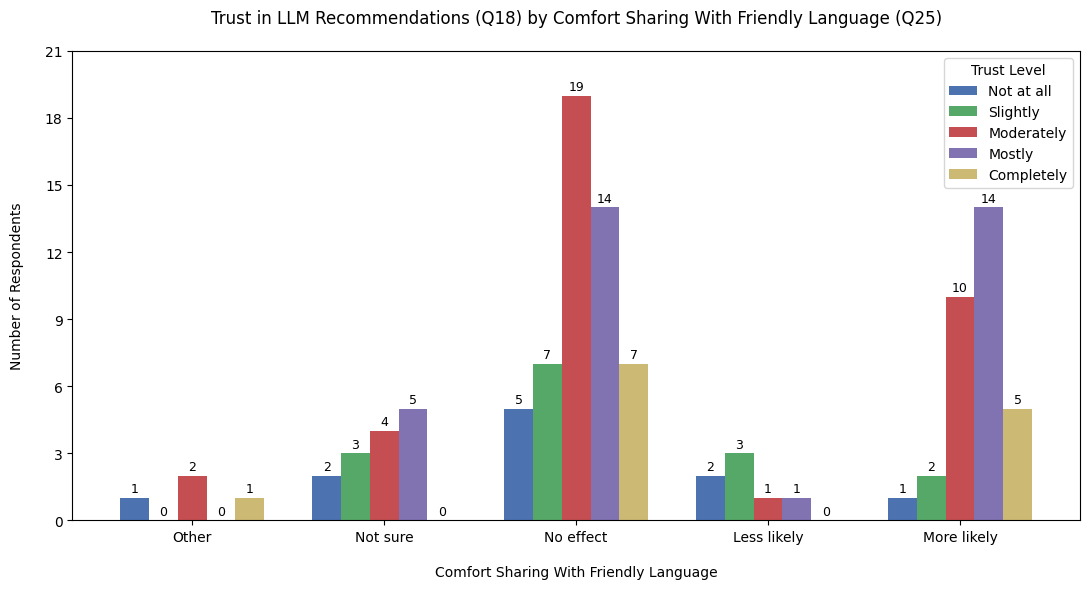

In [150]:
# QX vs QX - Cross-analysis

q1_qid = 'Q25_prepped'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_xaxis=True)


Counts:
 Q18_labeled                               Not at all  Slightly  Moderately  Mostly  Completely
Q27_prepped                                                                                   
Yes, many times                                    1         0           0       9           5
Yes, sometimes                                     2         4          11      16           6
No, but I’ve used it for other topics              3         7          17       8           2
No, I’ve never used tools like ChatGPT             3         3           3       1           0
I’ve heard of them, but never tried them           2         0           5       0           0
Other                                              0         1           0       0           0

Percentages (row-wise):
 Q18_labeled                               Not at all  Slightly  Moderately  Mostly  Completely
Q27_prepped                                                                                   
Yes, many times

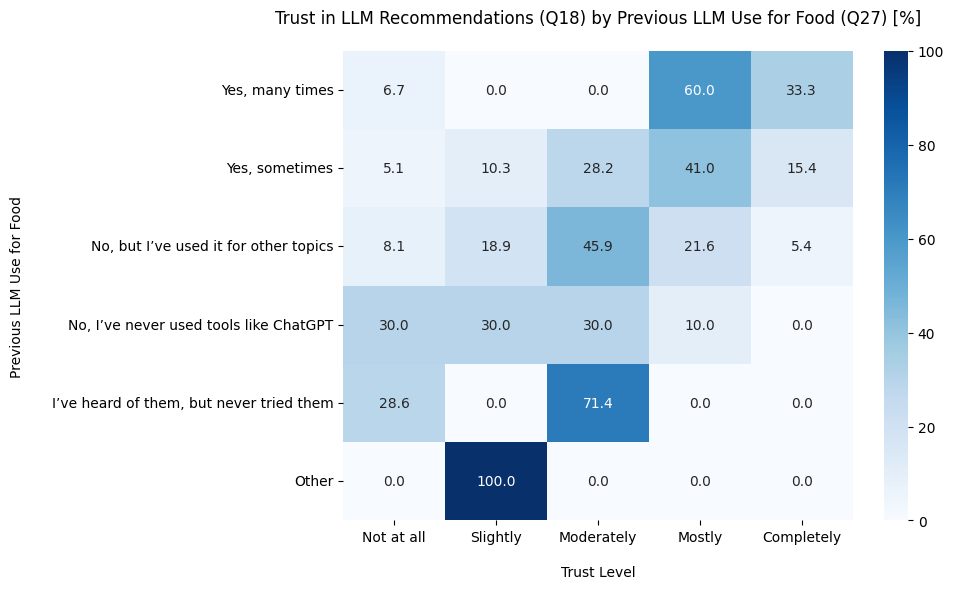

In [151]:
# QX vs QX - Cross-analysis

q1_qid = 'Q27_prepped'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 3

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q31_prepped  A chat-style conversation  A form where I fill in options and get advice  A mix of both  Not sure  Other
Q28_prepped                                                                                                          
No                                   9                                              7             31         6      2
Yes                                  9                                              5             36         3      1

Percentages (row-wise):
 Q31_prepped  A chat-style conversation  A form where I fill in options and get advice  A mix of both  Not sure  Other
Q28_prepped                                                                                                          
No                                16.4                                           12.7           56.4      10.9    3.6
Yes                               16.7                                            9.3           66.7       5.6    1.9


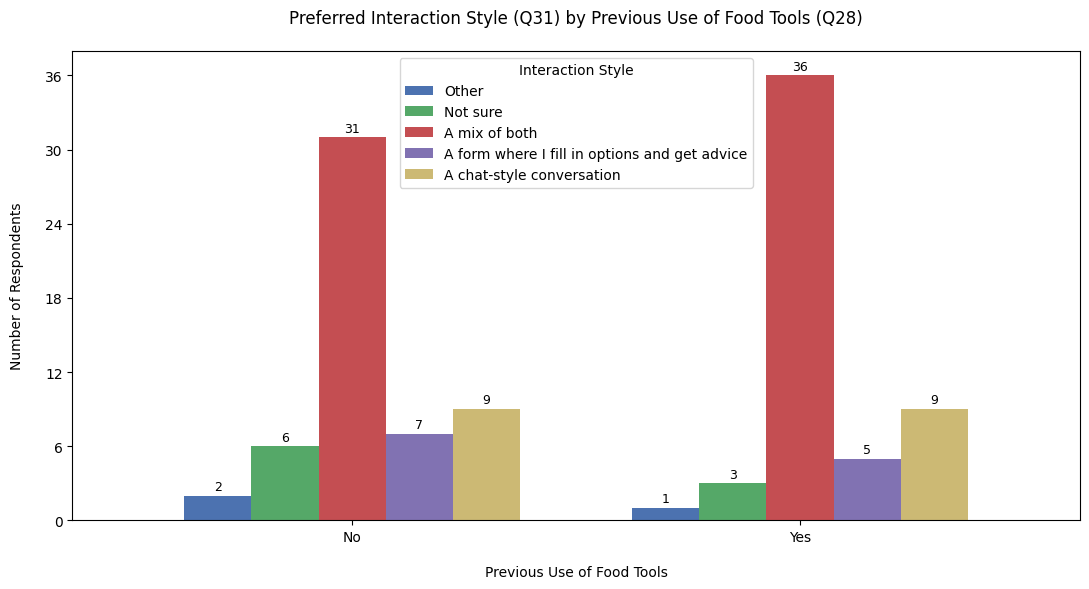

In [152]:
# QX vs QX - Cross-analysis

q1_qid = 'Q28_prepped'
q2_qid = 'Q31_prepped'
label_ex = 'Interaction Style'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_legend=True, flip_xaxis=True)


Counts:
 Q34_labeled  Not at all  Slightly  Moderately  Very  Very much
Q28_prepped                                                   
No                    5         2          17    17         14
Yes                   3         7          15    10         19

Percentages (row-wise):
 Q34_labeled  Not at all  Slightly  Moderately  Very  Very much
Q28_prepped                                                   
No                  9.1       3.6        30.9  30.9       25.5
Yes                 5.6      13.0        27.8  18.5       35.2


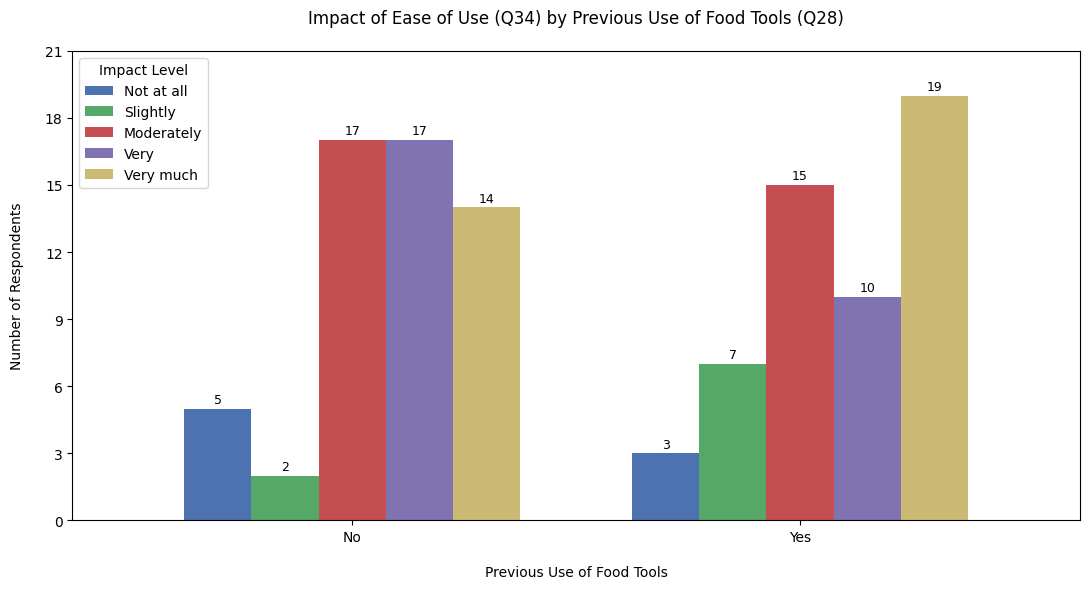

In [153]:
# QX vs QX - Cross-analysis

q1_qid = 'Q28_prepped'
q2_qid = 'Q34_labeled'
label_ex = 'Impact Level'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex, flip_xaxis=True)


Counts:
 Q18_labeled           Not at all  Slightly  Moderately  Mostly  Completely
Q32_labeled                                                               
Not confident at all           2         0           0       0           0
Slightly confident             2         3           3       0           1
Moderately confident           3         1          15       4           1
Confident                      1         8          14      18           2
Very confident                 3         3           4      12           9

Percentages (row-wise):
 Q18_labeled           Not at all  Slightly  Moderately  Mostly  Completely
Q32_labeled                                                               
Not confident at all       100.0       0.0         0.0     0.0         0.0
Slightly confident          22.2      33.3        33.3     0.0        11.1
Moderately confident        12.5       4.2        62.5    16.7         4.2
Confident                    2.3      18.6        32.6    41.9   

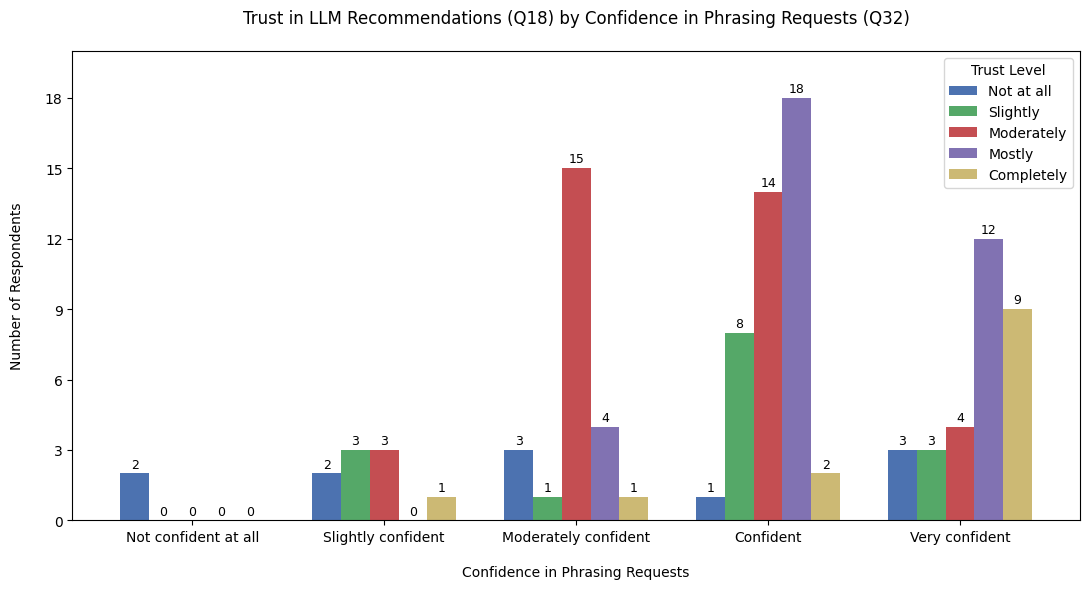

In [154]:
# QX vs QX - Cross-analysis

q1_qid = 'Q32_labeled'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q34_labeled           Not at all  Slightly  Moderately  Very  Very much
Q32_labeled                                                            
Not confident at all           2         0           0     0          0
Slightly confident             1         4           3     0          1
Moderately confident           2         1          11     8          2
Confident                      2         4          10    16         11
Very confident                 1         0           8     3         19

Percentages (row-wise):
 Q34_labeled           Not at all  Slightly  Moderately  Very  Very much
Q32_labeled                                                            
Not confident at all       100.0       0.0         0.0   0.0        0.0
Slightly confident          11.1      44.4        33.3   0.0       11.1
Moderately confident         8.3       4.2        45.8  33.3        8.3
Confident                    4.7       9.3        23.3  37.2       25.6
Very confident               

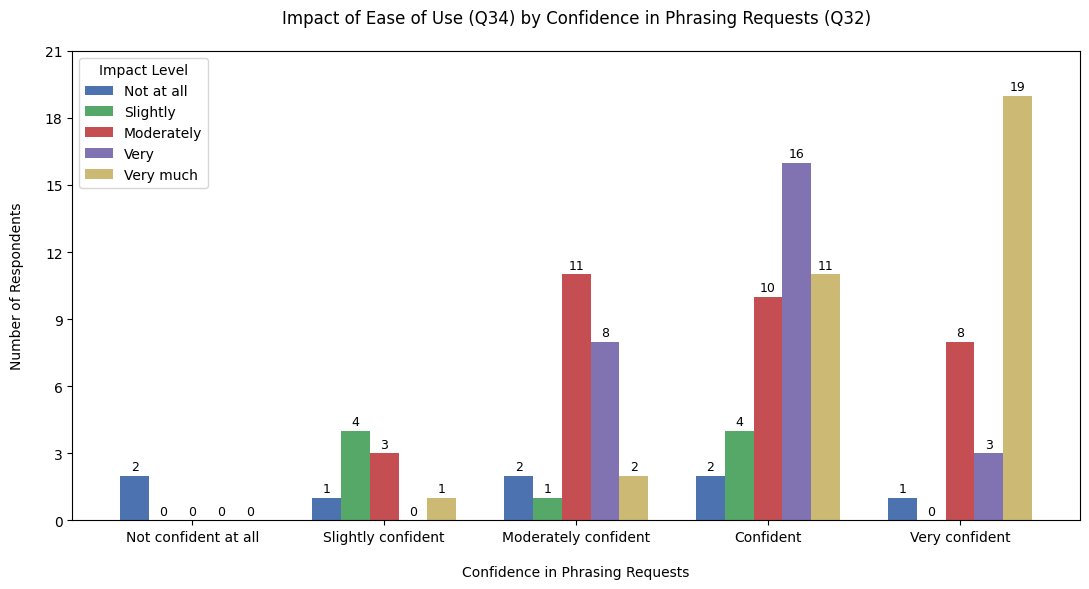

In [155]:
# QX vs QX - Cross-analysis

q1_qid = 'Q32_labeled'
q2_qid = 'Q34_labeled'
label_ex = 'Impact Level'
plot = 1

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(q1_qid, q1_qid)
label_y = q_labels.get(q2_qid, q2_qid)
chart_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, label_x, plot, chart_title, heatmap_title, label_ex)


Counts:
 Q18_labeled                                         Not at all  Slightly  Moderately  Mostly  Completely
Q20_It gives a scientific or nutritional reason...                                                      
No                                                           7         5          15      13           2
Yes                                                          4        10          21      21          11

Percentages (row-wise):
 Q18_labeled                                         Not at all  Slightly  Moderately  Mostly  Completely
Q20_It gives a scientific or nutritional reason...                                                      
No                                                        16.7      11.9        35.7    31.0         4.8
Yes                                                        6.0      14.9        31.3    31.3        16.4


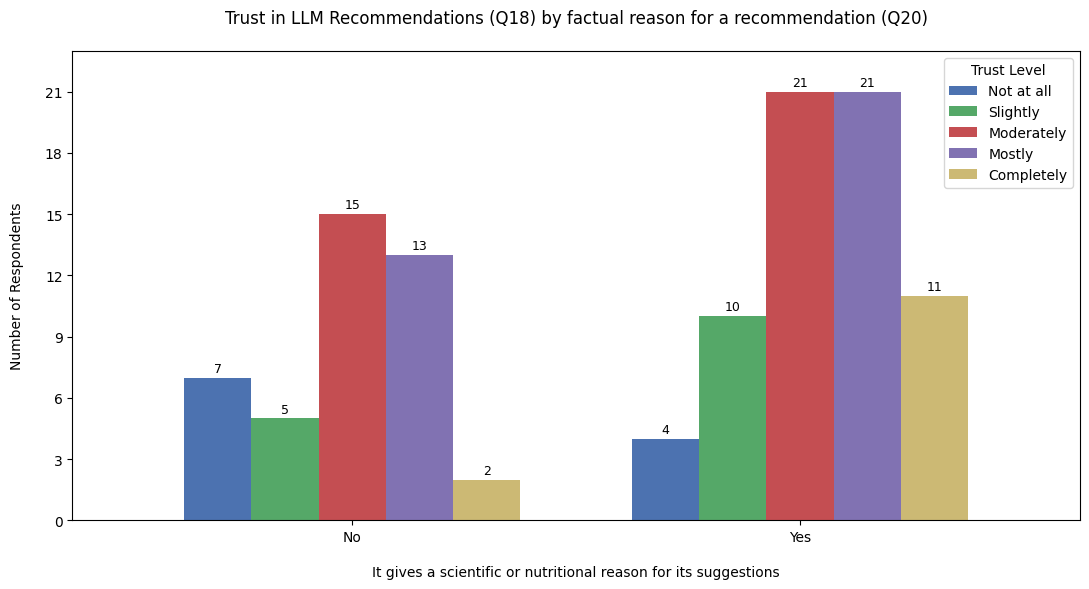

In [156]:
# QX vs QX - Cross-analysis

""" Q20_
- It matches my dietary needs
- It reflects my mood or energy level
- It gives a scientific or nutritional reason for its suggestions
- It builds on what I’ve chosen before
- It uses friendly or human-like language
- It fits my current routine or schedule
- It allows me to give feedback on suggestions
 """
def name_label(label):
    return label.split('_')[1]

q1_qid = 'Q20_It gives a scientific or nutritional reason for its suggestions'
q2_qid = 'Q18_labeled'
label_ex = 'Trust Level'
plot = 1 #2

def clean_label(label):
    return label.split('_')[0]

label_x = q_labels.get(clean_label(q1_qid), clean_label(q1_qid))
label_y = q_labels.get(clean_label(q2_qid), clean_label(q2_qid))
chart_title = f"{label_y} ({clean_label(q2_qid)}) by factual reason for a recommendation ({clean_label(q1_qid)})"
heatmap_title = f"{label_y} ({clean_label(q2_qid)}) by {label_x} ({clean_label(q1_qid)}) [%]"

cross_analysis(q1_qid, q2_qid, name_label(q1_qid), plot, chart_title, heatmap_title, label_ex)
